# MACHINE LEARNING PROJECT:AUTOMOBILE PRICE PREDICTION

## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## MOUNTING THE GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LOAD THE DATA

In [3]:
pd.options.display.max_columns=30
pd.options.display.max_rows=200

In [5]:
auto=pd.read_csv('/content/drive/MyDrive/Automobile/auto_imports.csv')
auto

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


## BUSINESS CASE:THE PROJECT IS ABOUT TO PREDICT THE PRICE OF IMPORT AUTOMOBILES. 

### BASIC CHECKS

In [6]:
auto.columns


Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [7]:
auto.columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
auto

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


In [8]:
auto.corr()


,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
symboling,1.000000,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.181073,-0.030158,0.041248,-0.083327
wheel_base,-0.529145,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.249689,-0.480029,-0.552211,0.589147
length,-0.364511,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.159203,-0.667658,-0.700186,0.691044
width,-0.237262,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.189008,-0.638155,-0.684700,0.752795
height,-0.542261,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.259526,-0.057087,-0.111568,0.137284
curb_weight,-0.234743,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.156444,-0.750390,-0.795515,0.834420
engine_size,-0.112069,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.029005,-0.651002,-0.679877,0.872337
compression_ratio,-0.181073,0.249689,0.159203,0.189008,0.259526,0.156444,0.029005,1.000000,0.330897,0.267929,0.071176
city_mpg,-0.030158,-0.480029,-0.667658,-0.638155,-0.057087,-0.750390,-0.651002,0.330897,1.000000,0.972024,-0.687186
highway_mpg,0.041248,-0.552211,-0.700186,-0.684700,-0.111568,-0.795515,-0.679877,0.267929,0.972024,1.000000,-0.705115


In [9]:
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

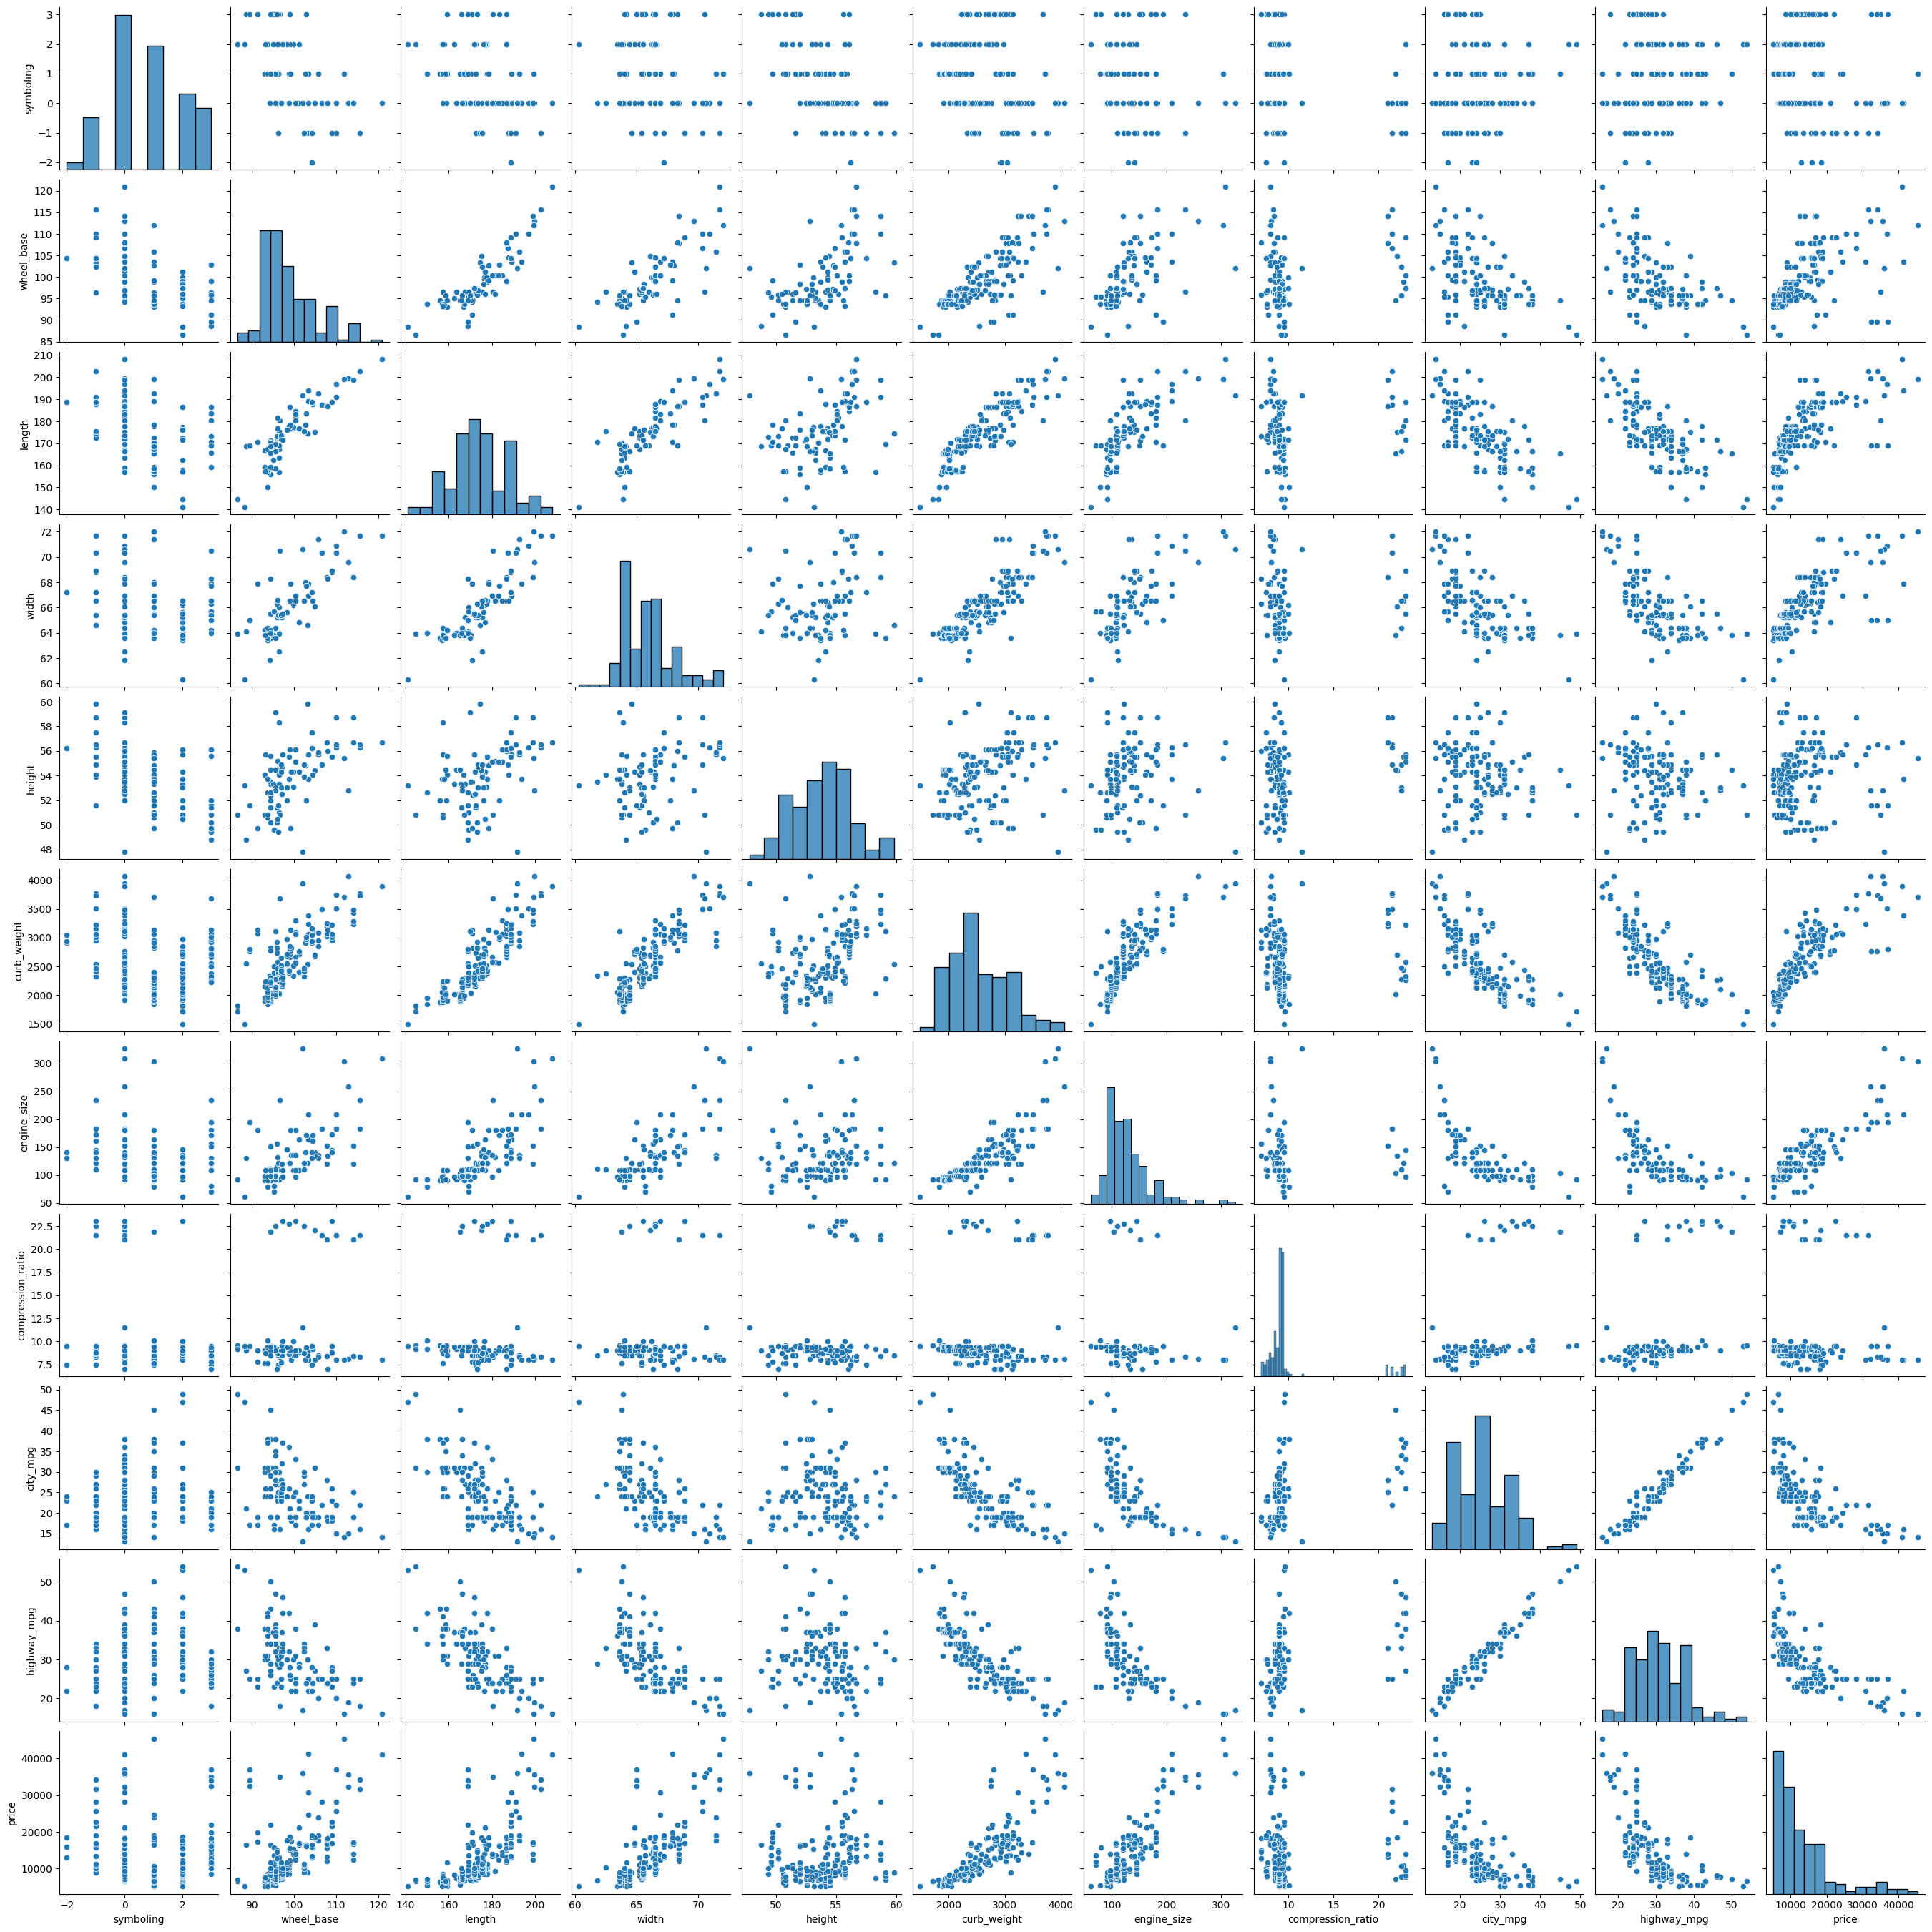

In [10]:
sb.pairplot(auto)


<Axes: >

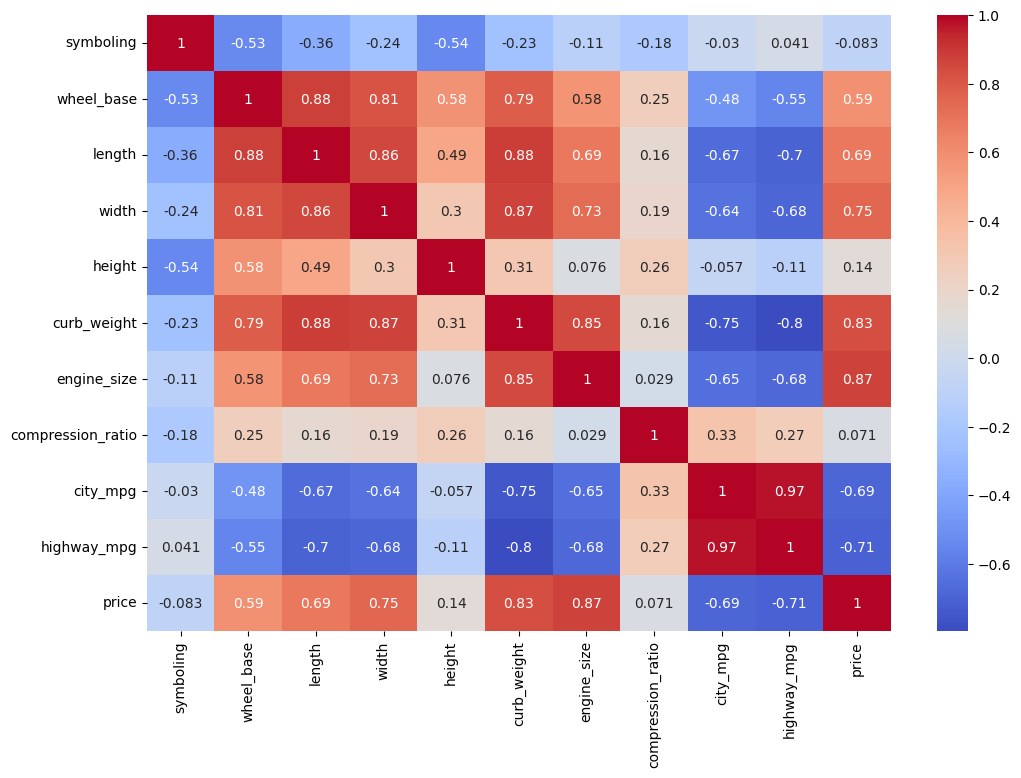

In [11]:
plt.figure(figsize=(12,8))

sb.heatmap(auto.corr(),annot=True,cmap="coolwarm")

In [12]:
auto.describe()


,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


#### To remove missing values

In [13]:
# To Remove the Missing values('?') in the features of normalized_losses, num_of_doors, bore, stroke , horsepower, peak_rpm, 'price'
auto=auto[auto != '?']
auto

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


In [14]:
auto.dropna(subset=['num_of_doors','horsepower','peak_rpm','bore','stroke'],how='any',inplace=True)


In [15]:
#    In numerical data missing values can be replaced with the “average” of the values that the columns have,
#    While in categorical data missing value can be handled with “Mode” (frequently occurring) value.

auto['normalized_losses'].fillna(auto['normalized_losses'].mode()[0], inplace=True)

In [16]:
auto

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,161,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,161,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


In [17]:
auto.isnull().sum()


symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

#### Dropping featurs based on corelation

In [18]:
auto.drop(['length','width','height',],axis=1,inplace=True)

# length and width are strong positive correlated with 'wheel_base'

In [19]:
auto.drop(['highway_mpg'],axis=1,inplace=True)

# highway_mpg is strongly correlated with City_mpg(97%)

In [20]:
auto.drop(['num_of_cylinders','stroke'],axis=1,inplace=True)# Since bore=stroke_length * no_of_cylinders

In [21]:
auto.drop('engine_location',axis=1,inplace=True)

# nearly 99% of values are same in the column i.e most of cars are front engine

In [22]:
#checking the correlation of features with target variable

auto.corr().price.sort_values(ascending=False)

price                1.000000
engine_size          0.888779
curb_weight          0.835374
wheel_base           0.589541
compression_ratio    0.074538
symboling           -0.085794
city_mpg            -0.707377
Name: price, dtype: float64

In [23]:
auto.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 199
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int64  
 1   normalized_losses  192 non-null    object 
 2   make               192 non-null    object 
 3   fuel_type          192 non-null    object 
 4   aspiration         192 non-null    object 
 5   num_of_doors       192 non-null    object 
 6   body_style         192 non-null    object 
 7   drive_wheels       192 non-null    object 
 8   wheel_base         192 non-null    float64
 9   curb_weight        192 non-null    int64  
 10  engine_type        192 non-null    object 
 11  engine_size        192 non-null    int64  
 12  fuel_system        192 non-null    object 
 13  bore               192 non-null    object 
 14  compression_ratio  192 non-null    float64
 15  horsepower         192 non-null    object 
 16  peak_rpm           192 non

In [24]:
auto.aspiration.value_counts()


std      157
turbo     35
Name: aspiration, dtype: int64

In [25]:
auto.make.value_counts()


toyota           32
nissan           18
mitsubishi       13
honda            13
subaru           12
mazda            12
volkswagen       12
peugot           11
volvo            11
dodge             8
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       2
isuzu             2
mercury           1
Name: make, dtype: int64

# **Exploratory Data Analysis**

<Axes: ylabel='count'>

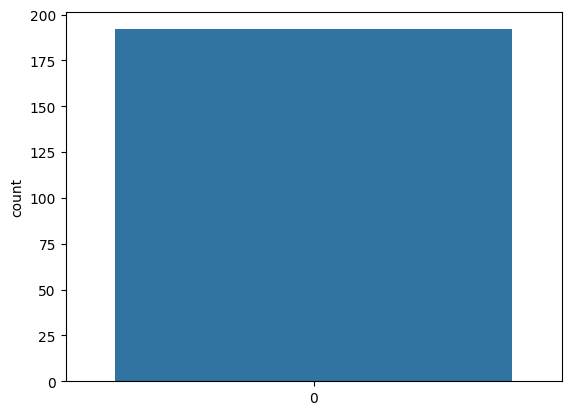

In [26]:
sb.countplot(auto['symboling'])


In [27]:
plt.figure(figsize=(25,20))
sb.countplot(auto.make)

ValueError: ignored

<Figure size 2500x2000 with 0 Axes>

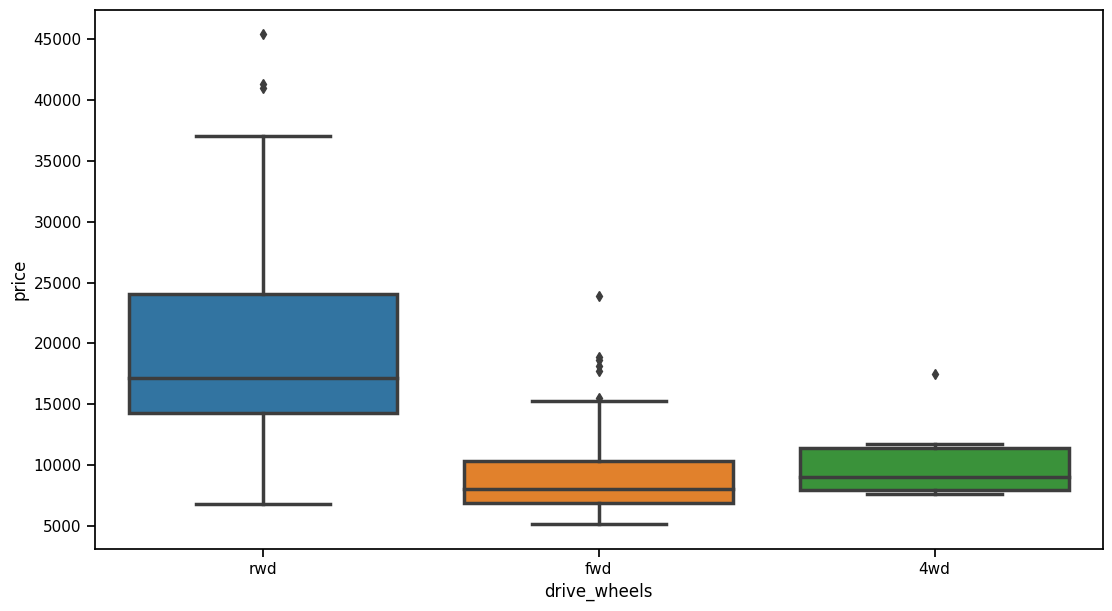

In [28]:
sb.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.rcParams['figure.figsize']=(10,5)
ax = sb.boxplot(x="drive_wheels", y="price", data=auto)

In [29]:
auto.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,wheel_base,curb_weight,engine_type,engine_size,fuel_system,bore,compression_ratio,horsepower,peak_rpm,city_mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,130,mpfi,3.47,9.0,111,5000,21,16500
1,1,161,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,152,mpfi,2.68,9.0,154,5000,19,16500
2,2,164,audi,gas,std,four,sedan,fwd,99.8,2337,ohc,109,mpfi,3.19,10.0,102,5500,24,13950
3,2,164,audi,gas,std,four,sedan,4wd,99.4,2824,ohc,136,mpfi,3.19,8.0,115,5500,18,17450
4,2,161,audi,gas,std,two,sedan,fwd,99.8,2507,ohc,136,mpfi,3.19,8.5,110,5500,19,15250


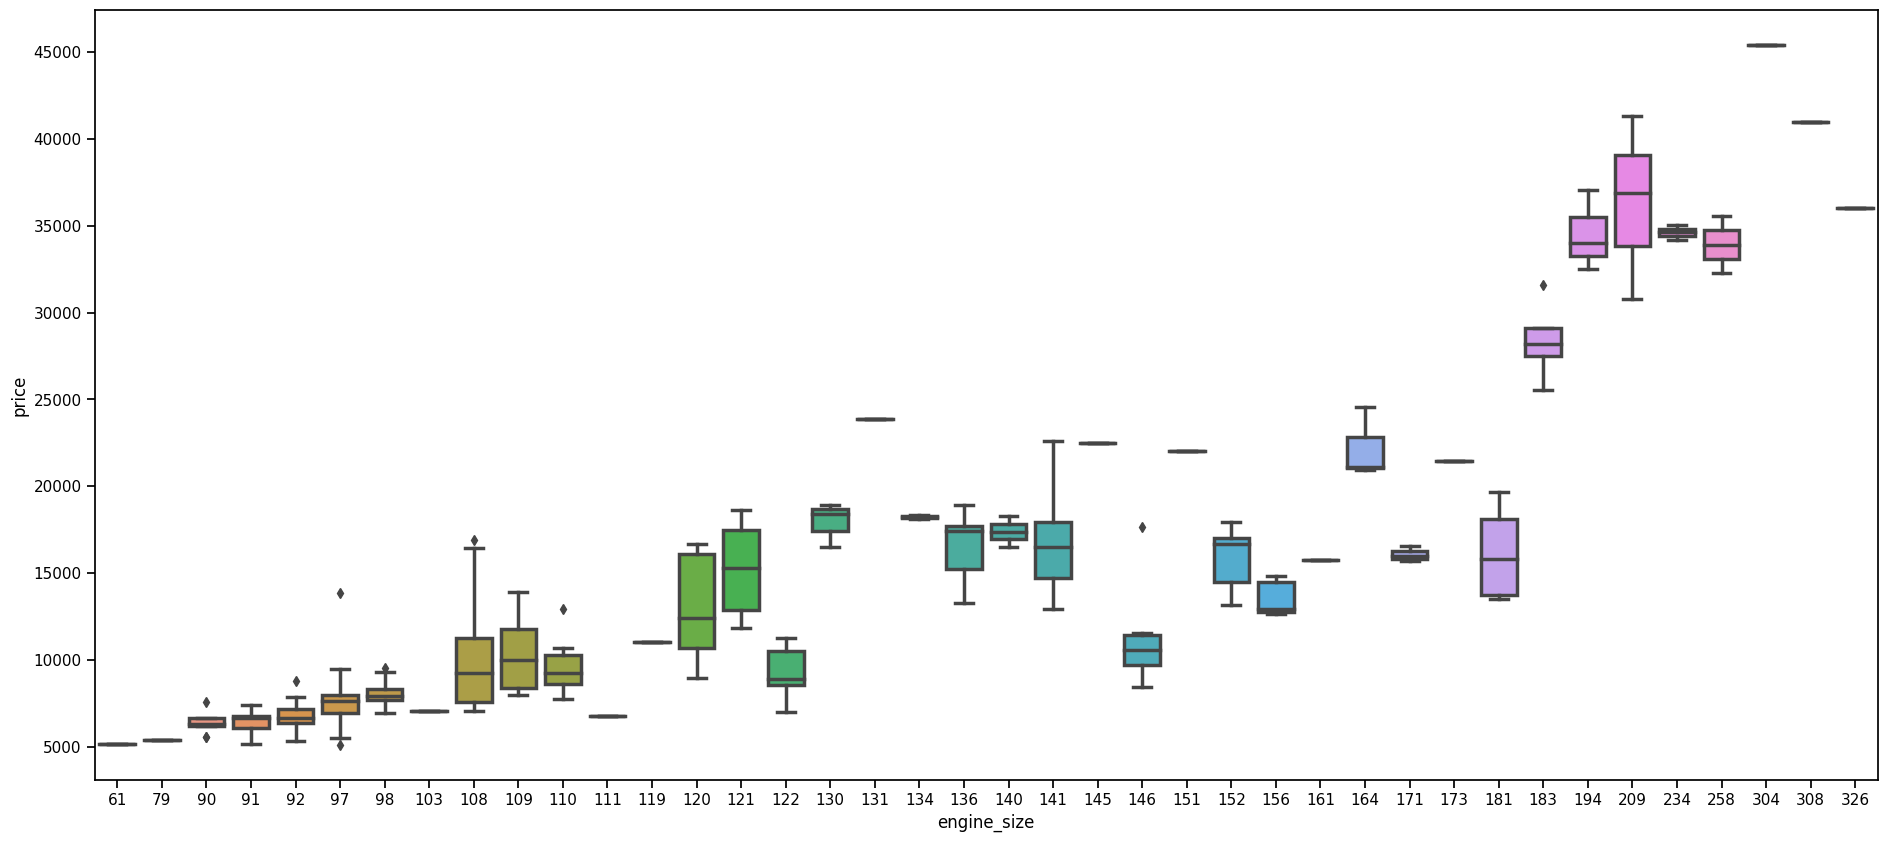

In [30]:
plt.rcParams['figure.figsize']=(23,10)
ax = sb.boxplot(x="engine_size", y="price", data=auto)

In [31]:
auto.fuel_type.value_counts()


gas       173
diesel     19
Name: fuel_type, dtype: int64

In [32]:
auto.fuel_system.value_counts()


mpfi    87
2bbl    64
idi     19
1bbl    11
spdi     9
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [33]:
auto.engine_type.value_counts()


ohc     141
ohcf     15
ohcv     13
l        12
dohc     11
Name: engine_type, dtype: int64

In [34]:
auto.aspiration.value_counts()


std      157
turbo     35
Name: aspiration, dtype: int64

In [35]:
auto.drive_wheels.value_counts()


fwd    114
rwd     70
4wd      8
Name: drive_wheels, dtype: int64

In [36]:
auto.shape


(192, 19)

<Axes: xlabel='price', ylabel='Density'>

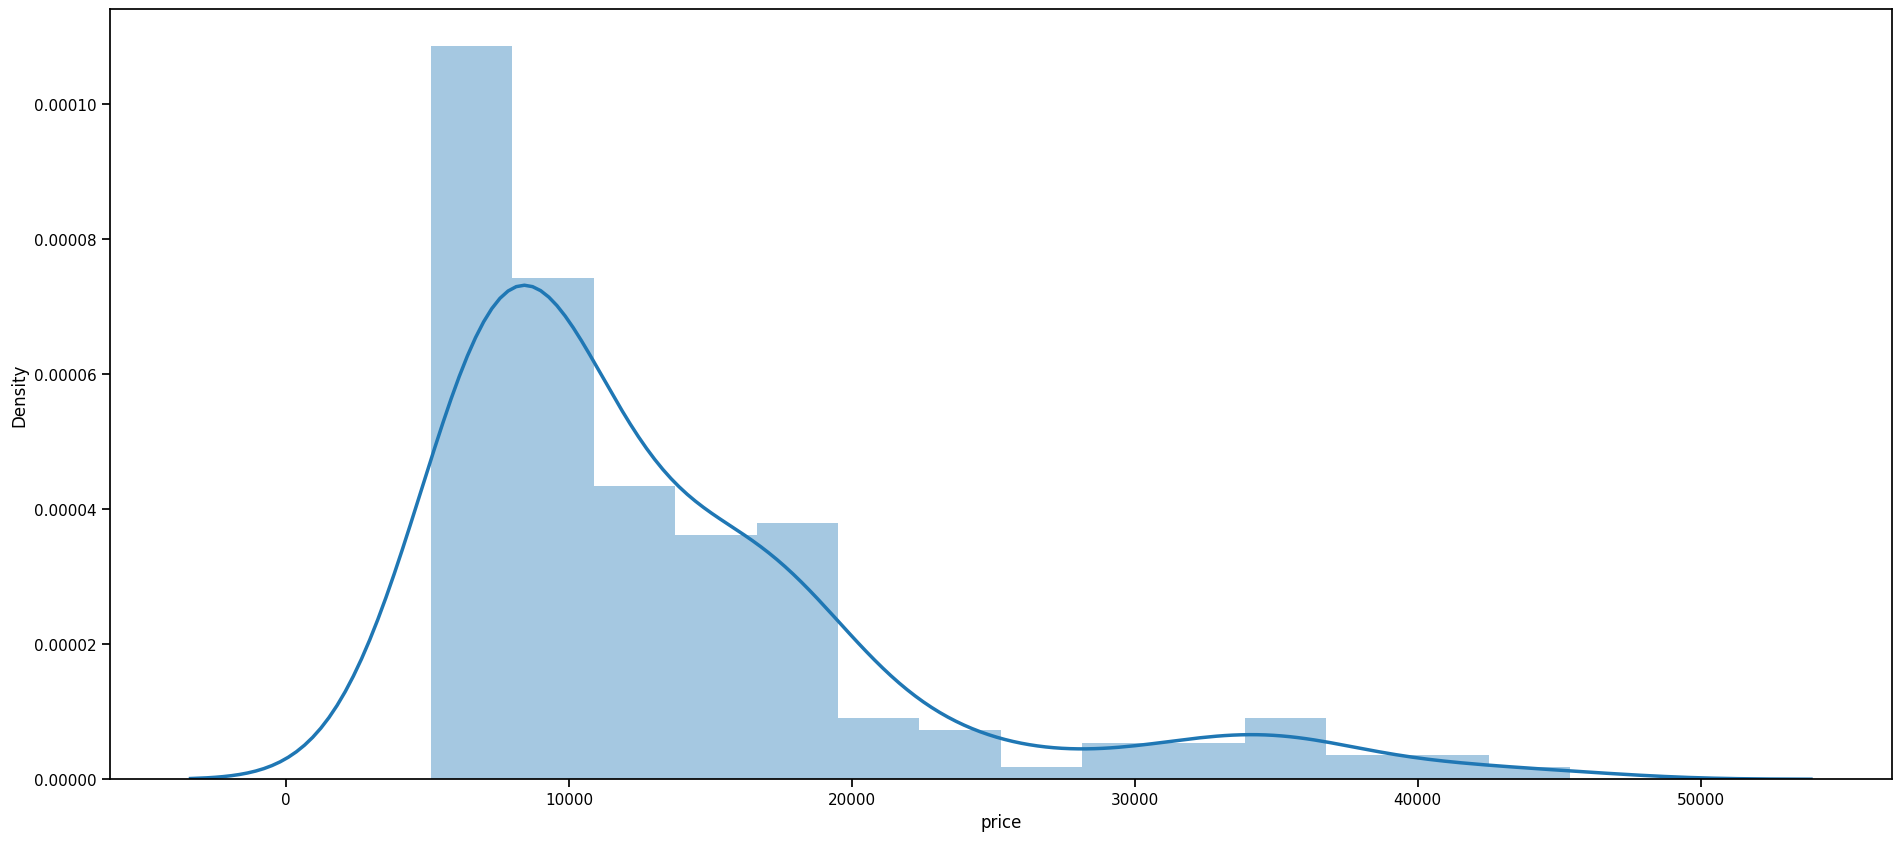

In [37]:
sb.distplot(auto['price']) #to check the distribution of target column


#### Symboling

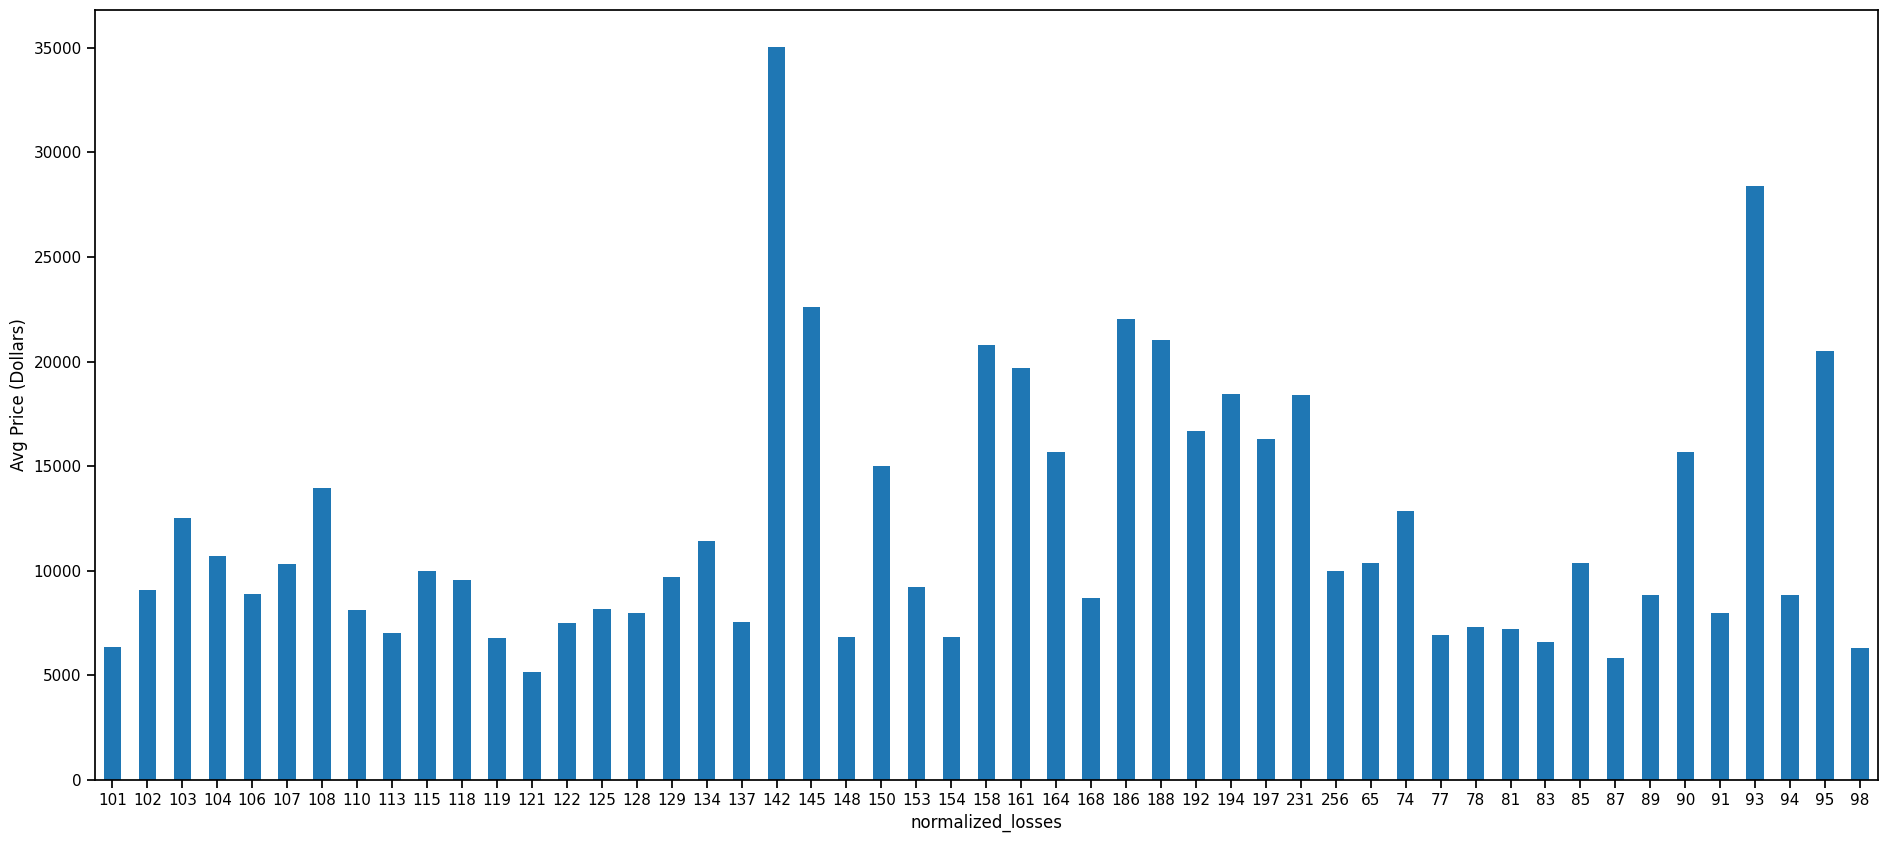

In [38]:
plt1 = auto[['normalized_losses','price']].groupby("normalized_losses").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("normalized_losses")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

drive_wheels

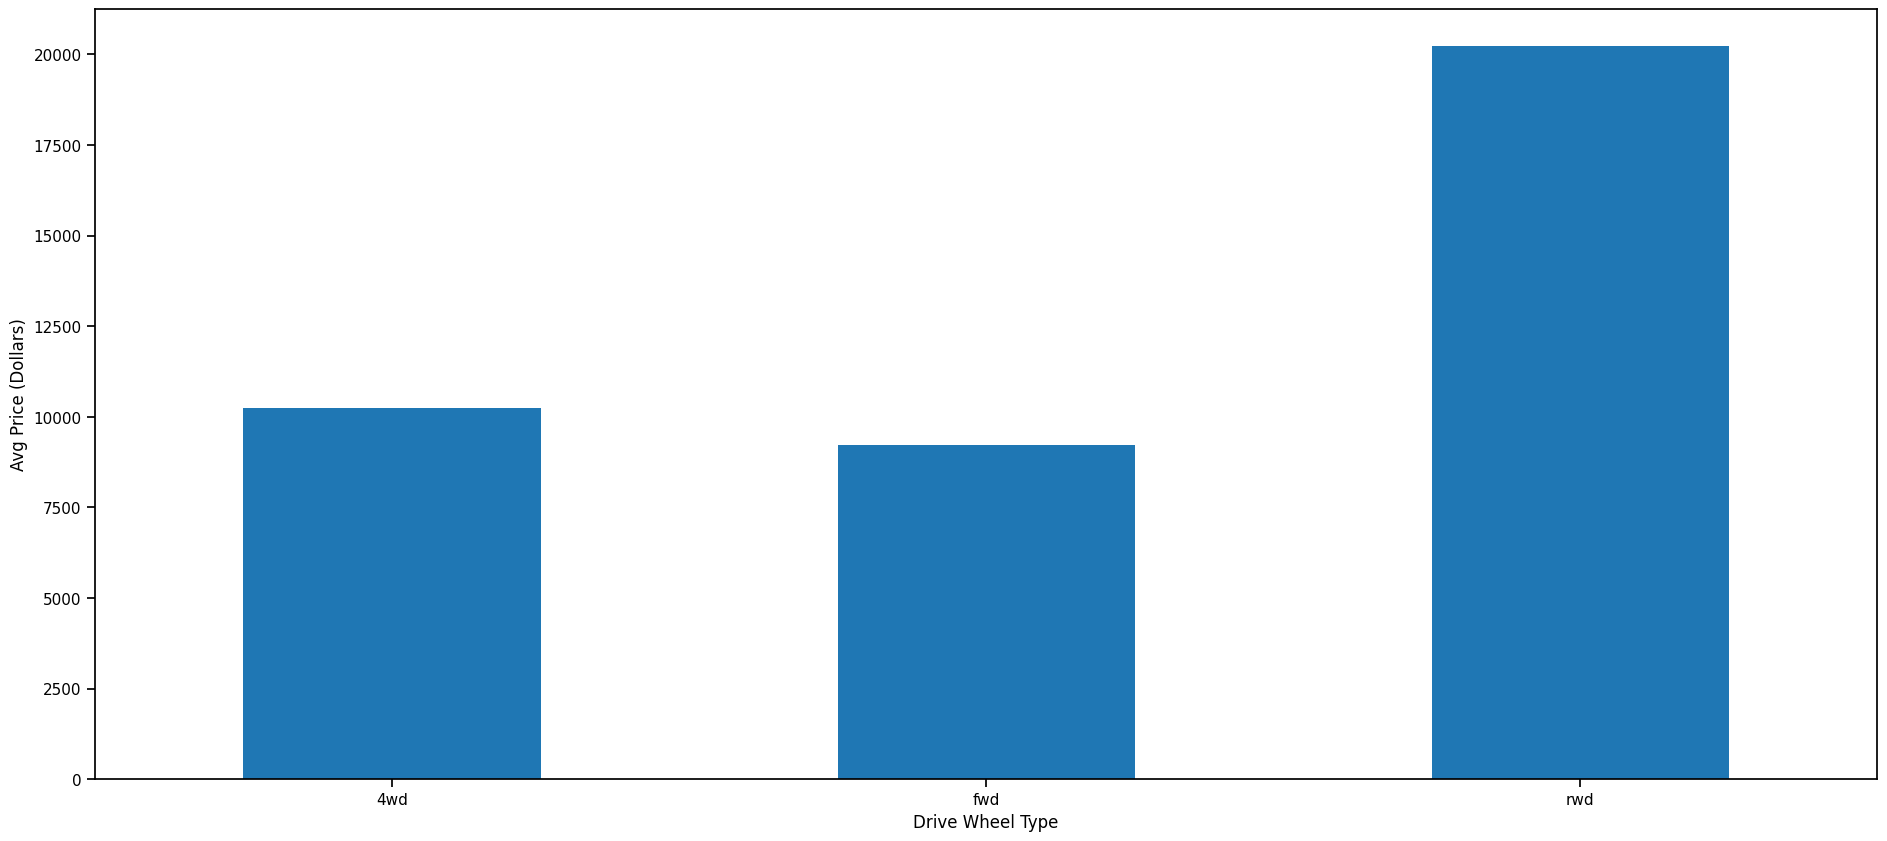

In [39]:
data_drivewheel_avg_price = auto[['drive_wheels','price']].groupby("drive_wheels", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = data_drivewheel_avg_price.plot(x = 'drive_wheels', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


#### wheel_base

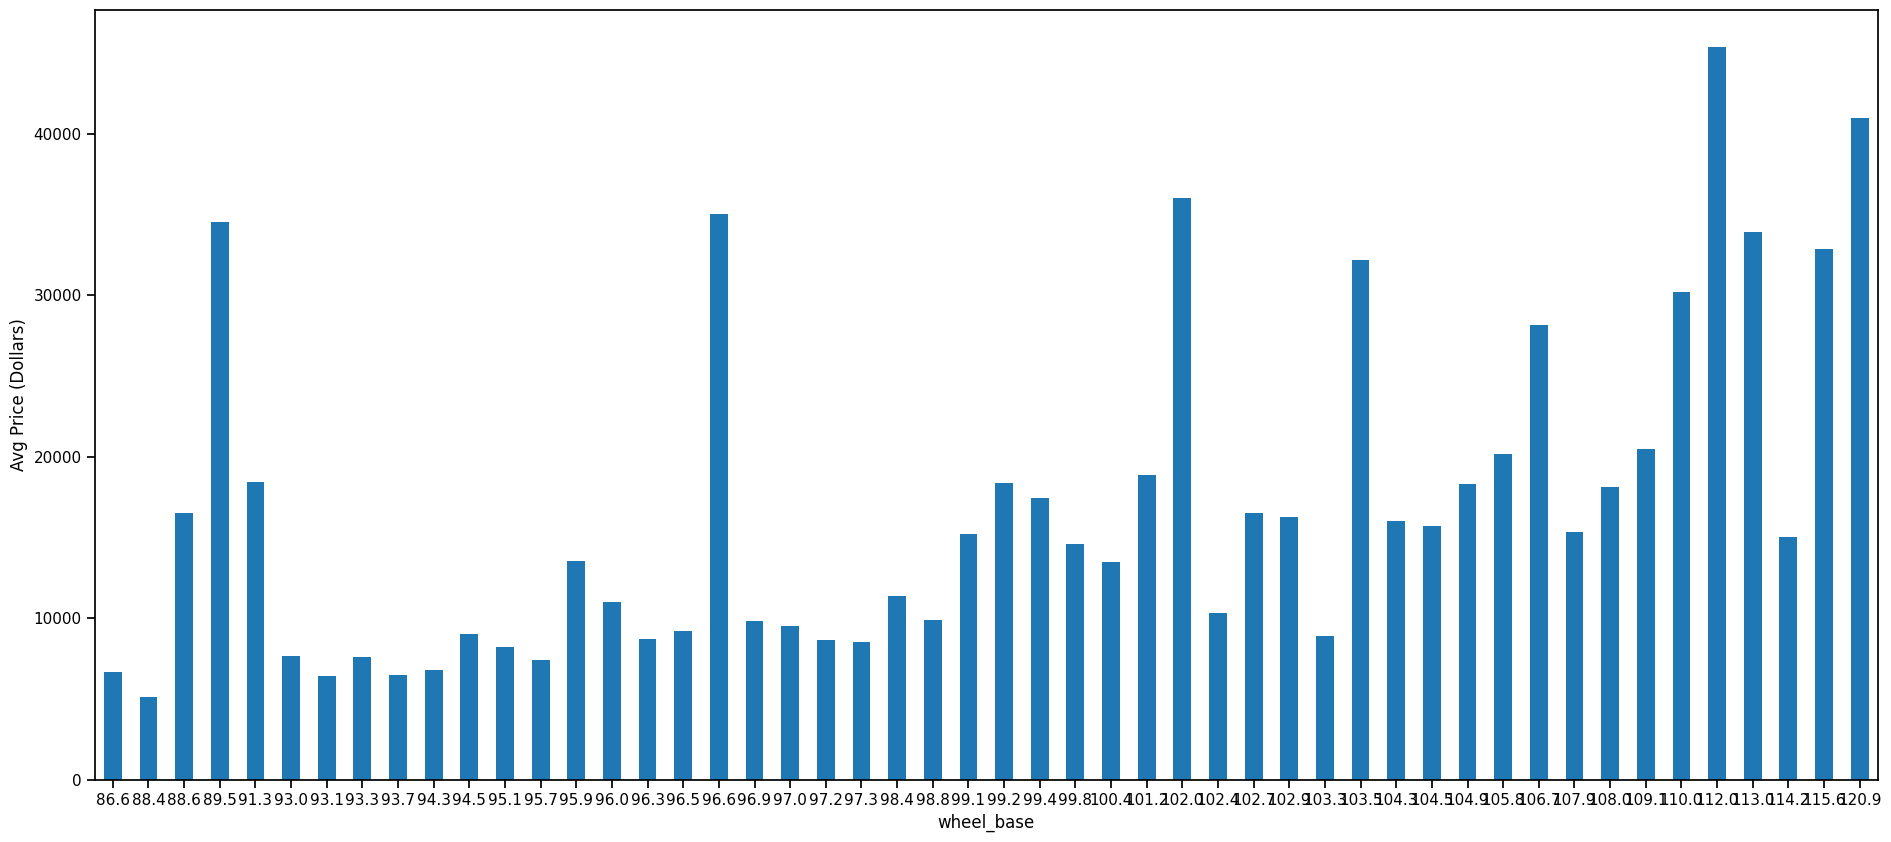

In [40]:
data_wheelbase_avg_price = auto[['wheel_base','price']].groupby("wheel_base", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = data_wheelbase_avg_price.plot(x = 'wheel_base', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("wheel_base")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


#### curb_weight

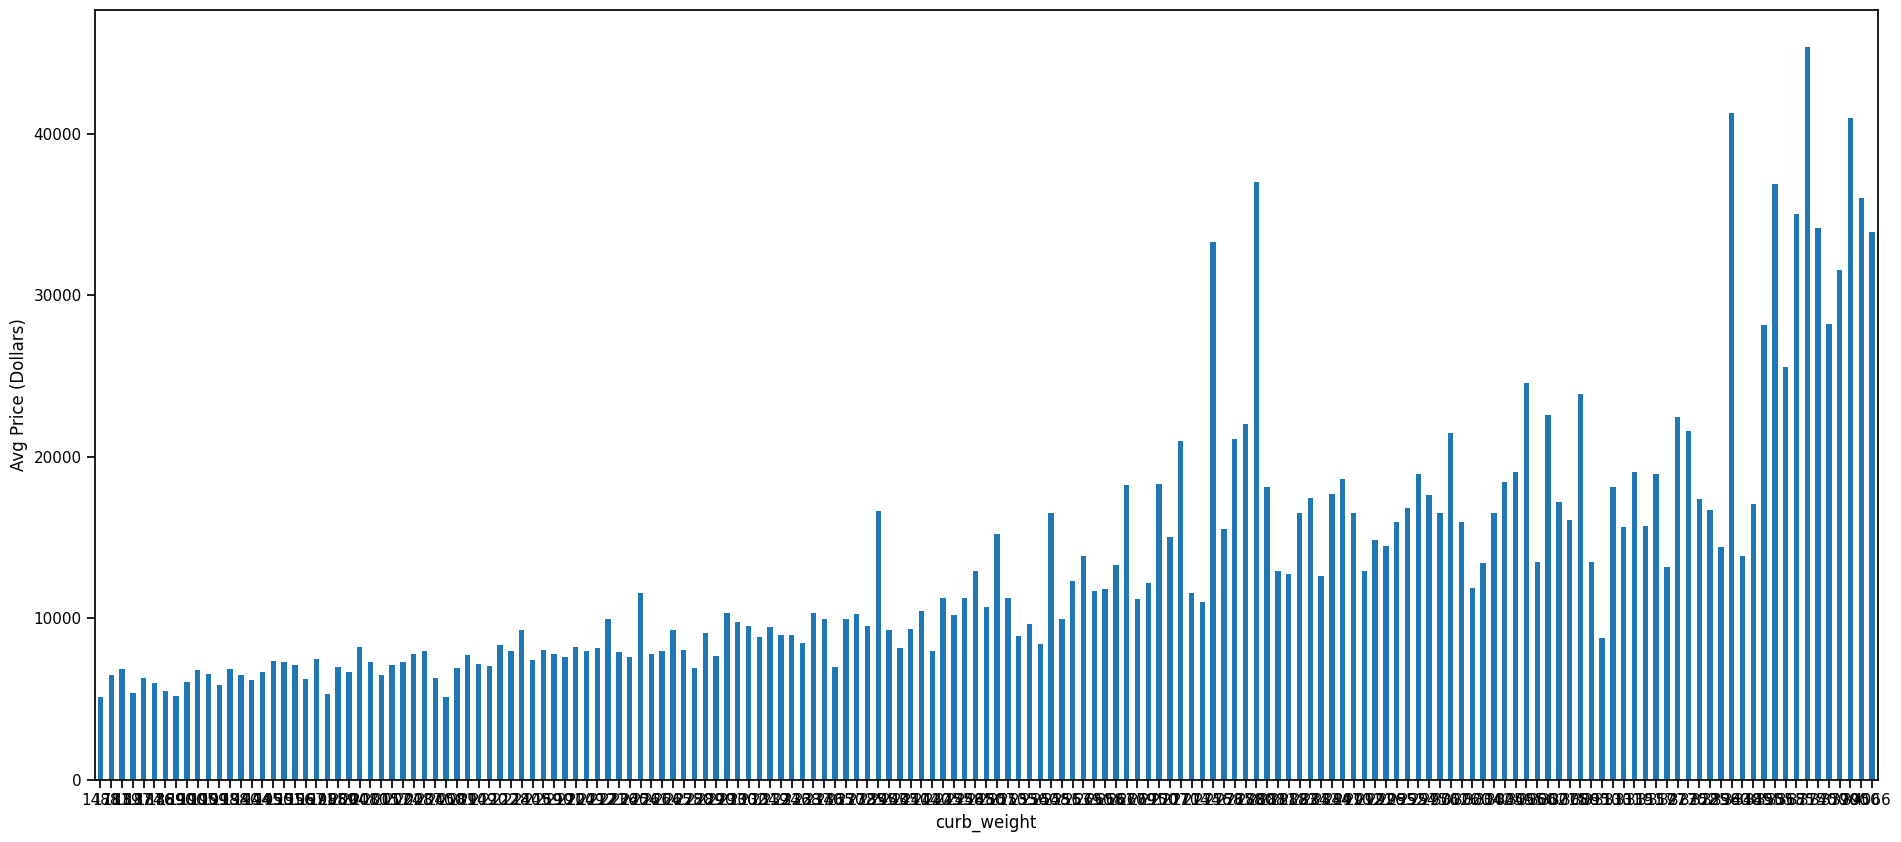

In [41]:
curb_weight_price = auto[['curb_weight','price']].groupby("curb_weight", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = curb_weight_price.plot(x = 'curb_weight', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("curb_weight")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


#### engine_size

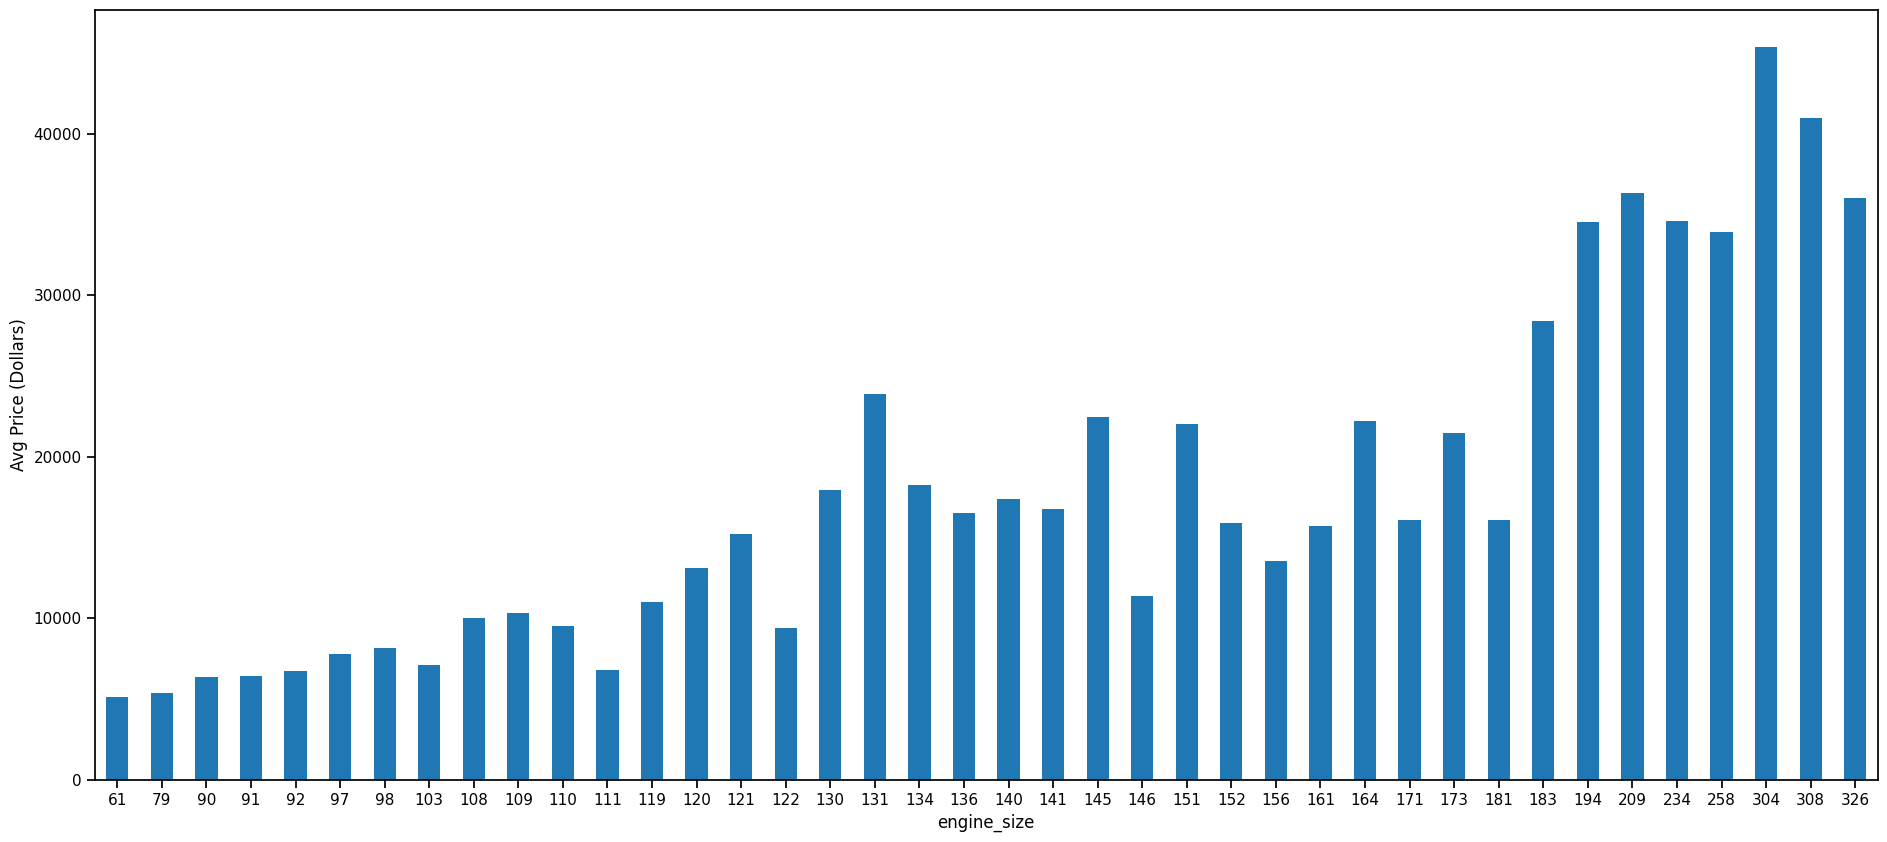

In [42]:
engine_size_price = auto[['engine_size','price']].groupby("engine_size", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = engine_size_price.plot(x = 'engine_size', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("engine_size")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### fuel_system

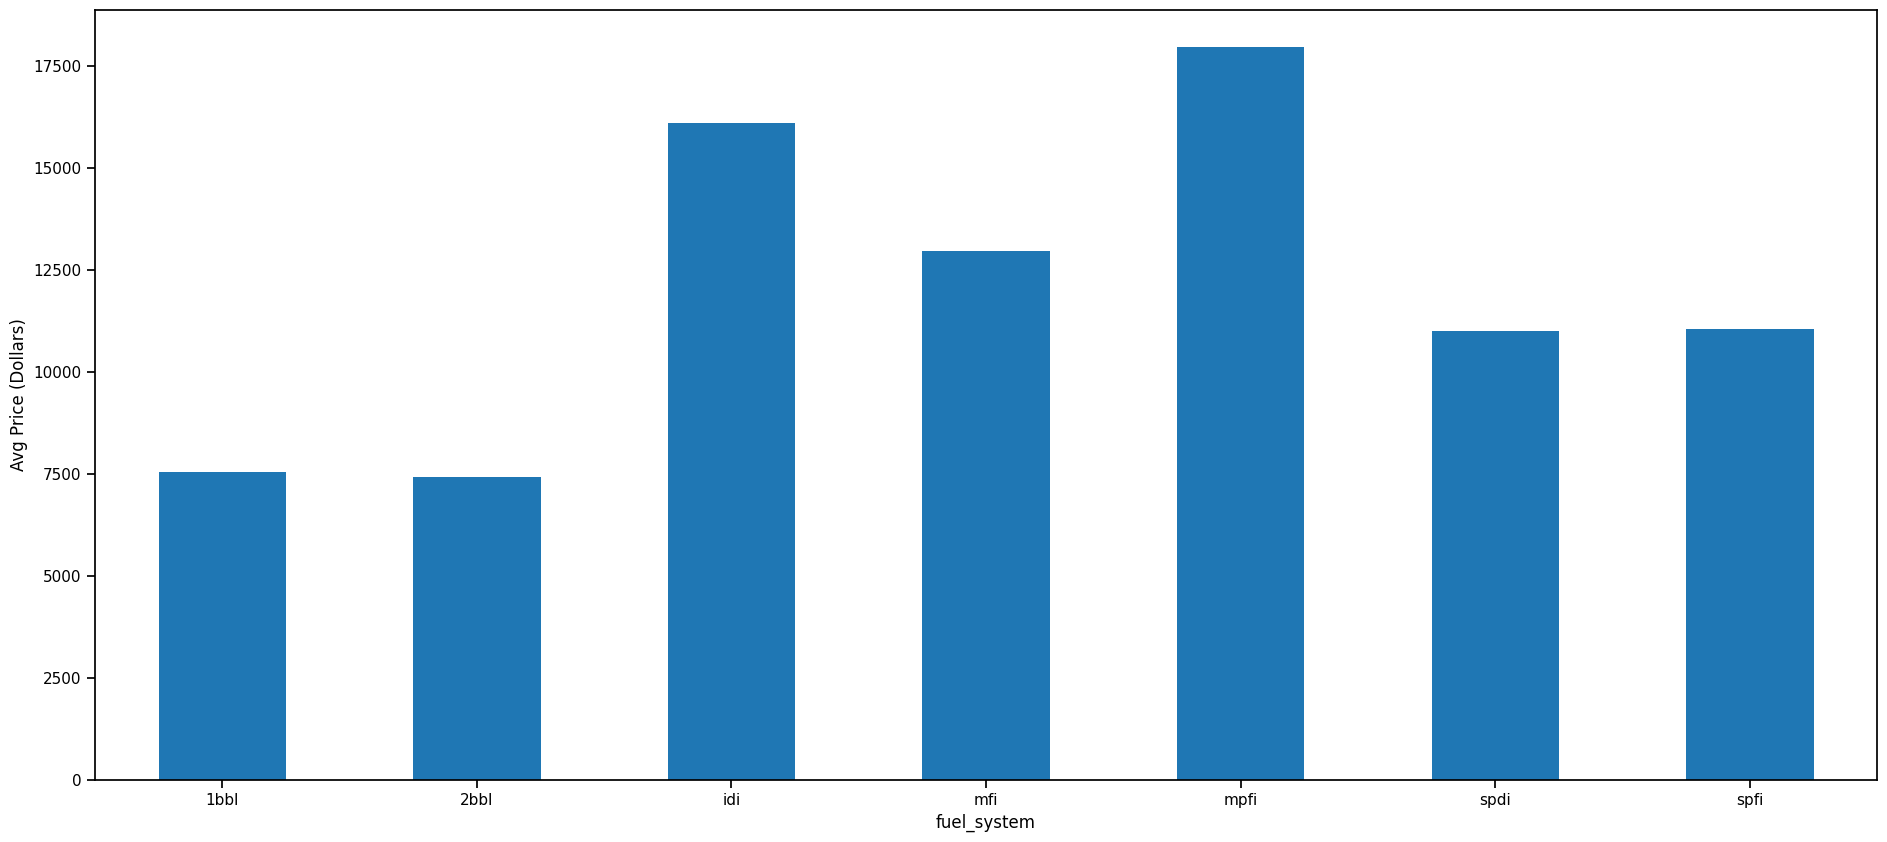

In [43]:
fuel_system_price = auto[['fuel_system','price']].groupby("fuel_system", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = fuel_system_price.plot(x = 'fuel_system', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("fuel_system")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### bore

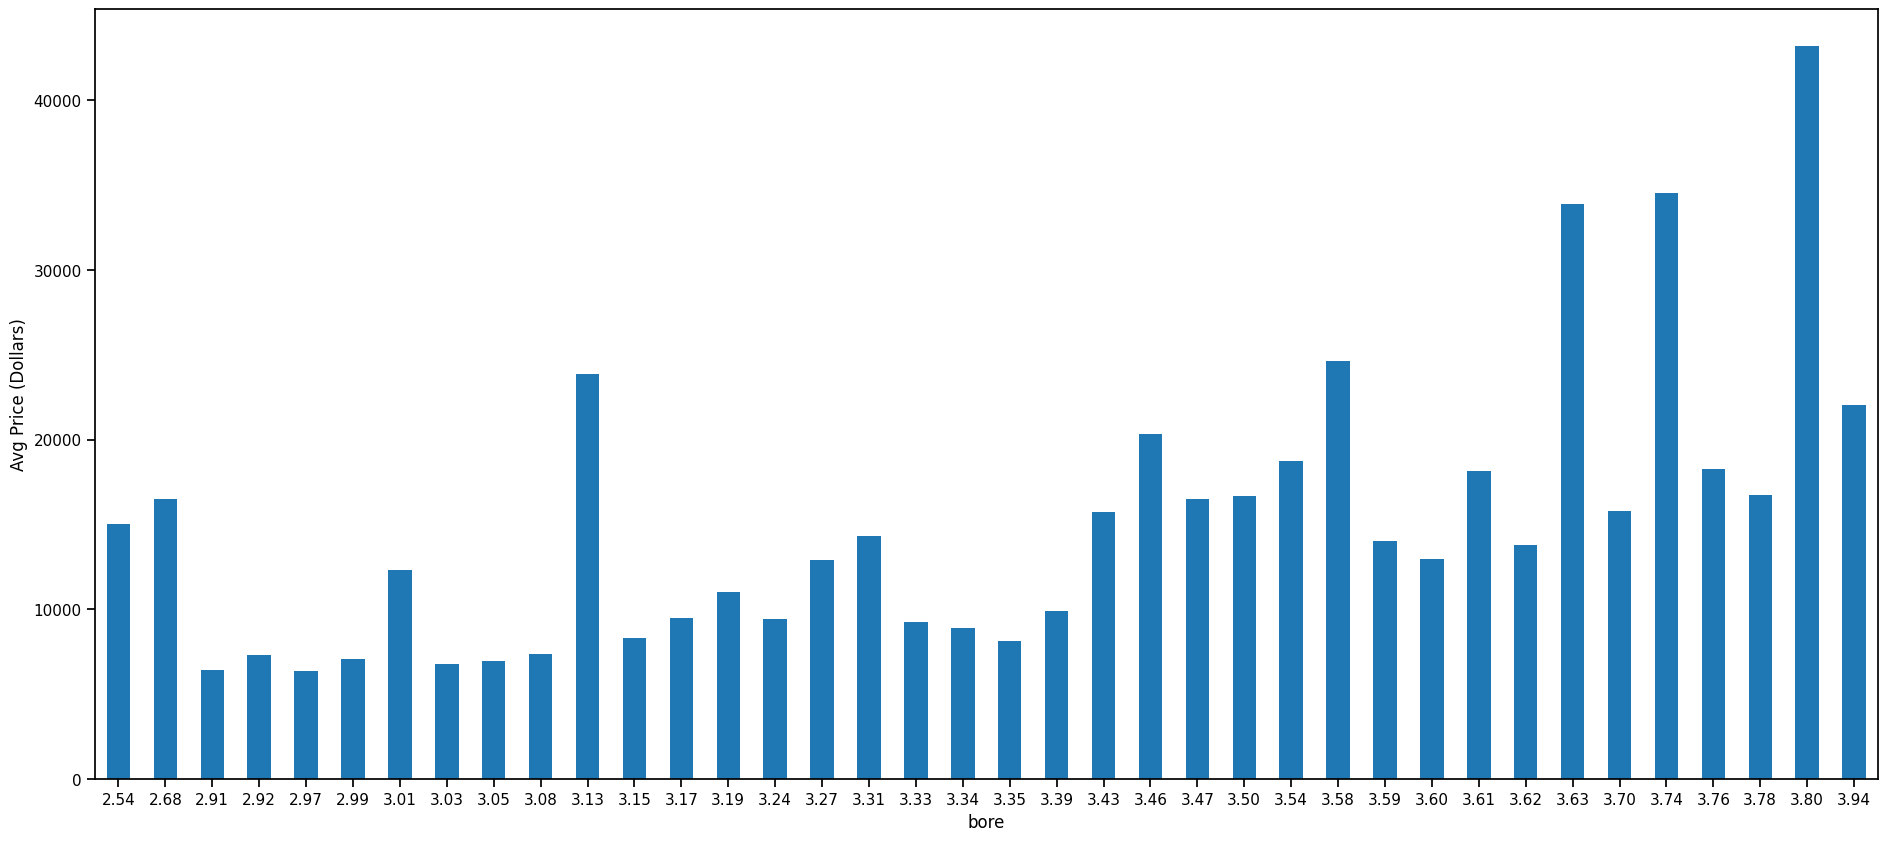

In [44]:
bore_price = auto[['bore','price']].groupby("bore", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = bore_price.plot(x = 'bore', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("bore")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### compression_ratio

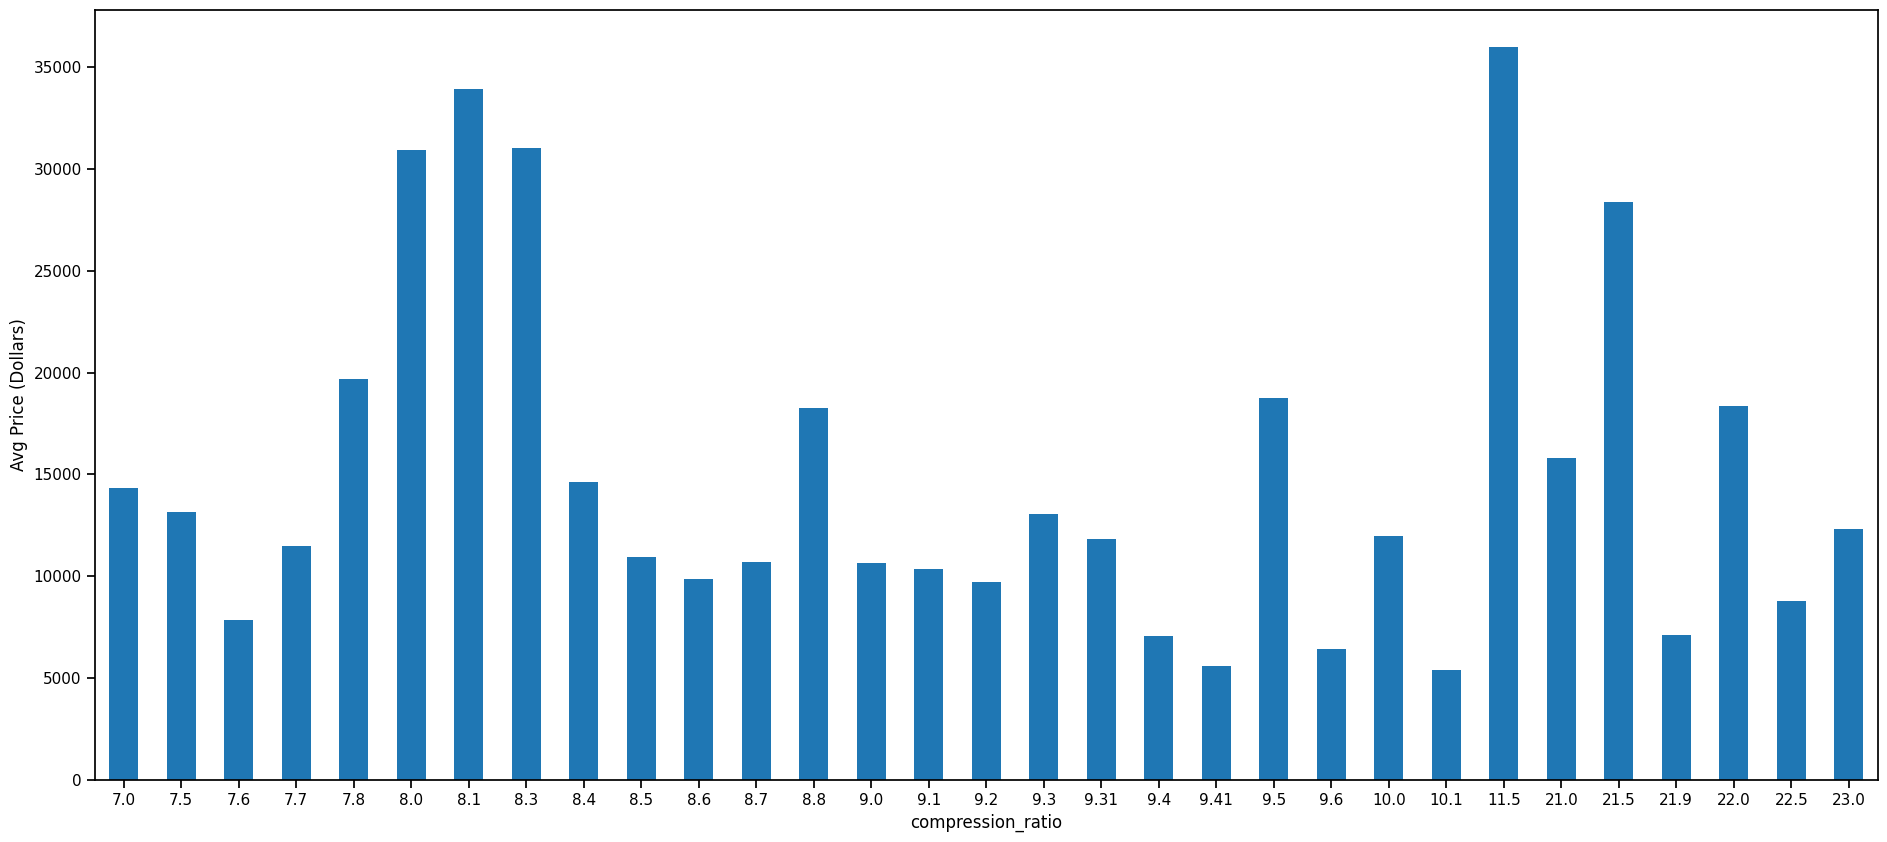

In [45]:
compression_ratio_price = auto[['compression_ratio','price']].groupby("compression_ratio", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 =compression_ratio_price.plot(x = 'compression_ratio', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("compression_ratio")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


#### horsepower

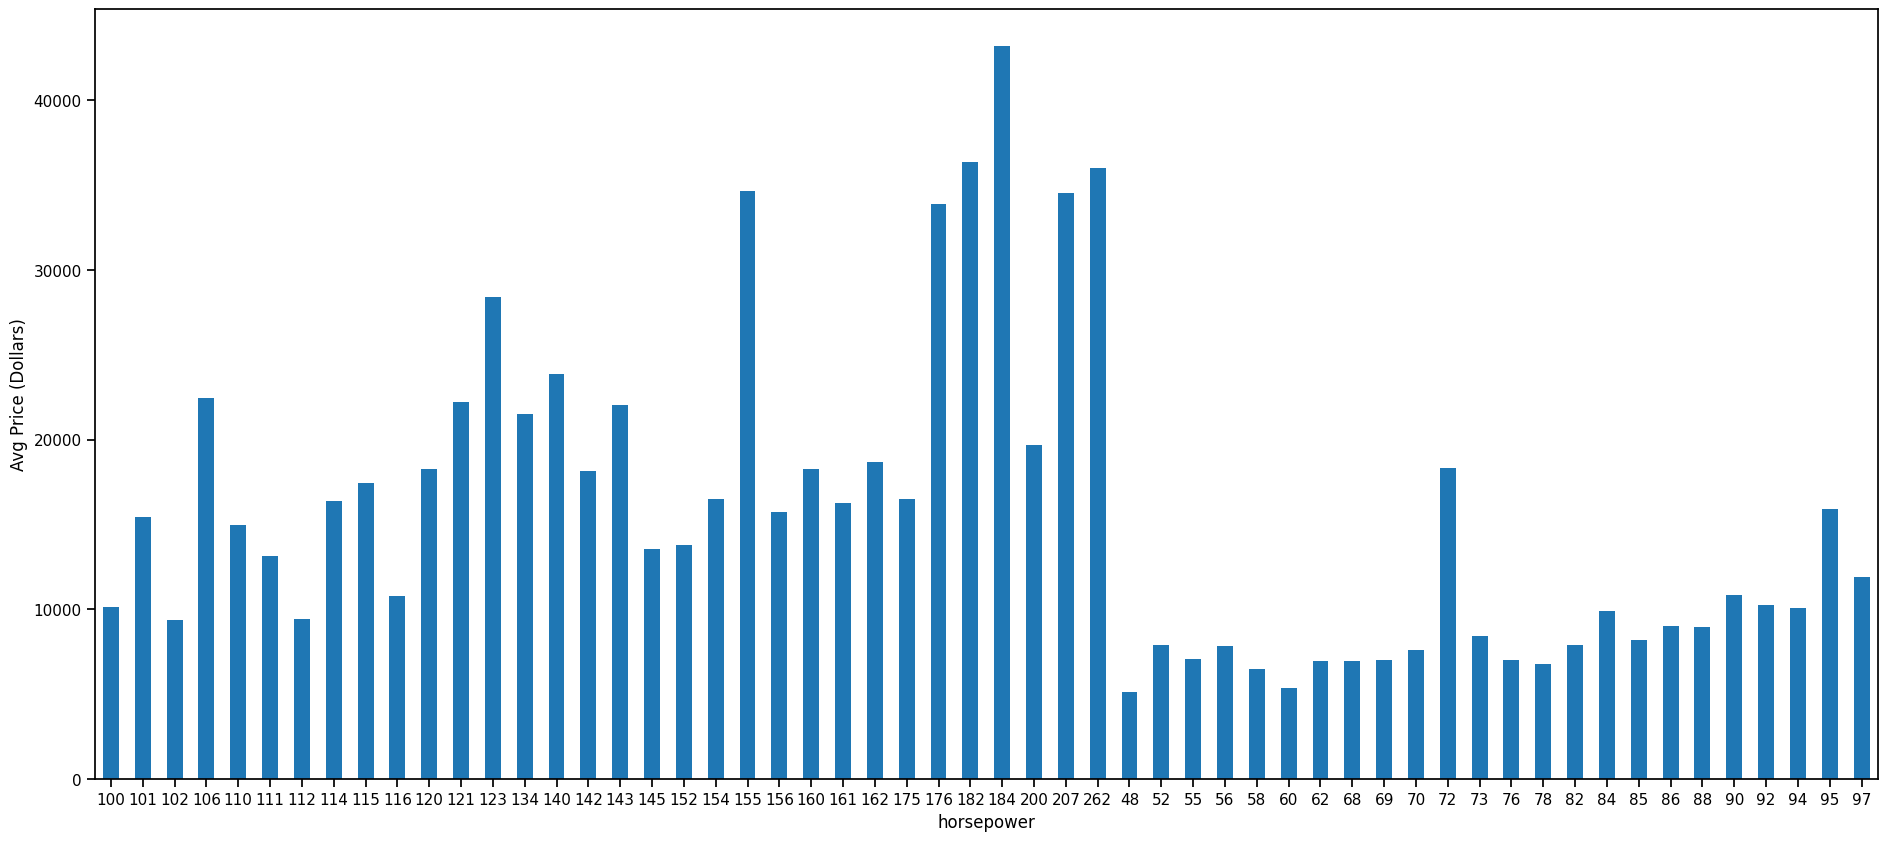

In [46]:
horsepower_price = auto[['horsepower','price']].groupby("horsepower", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 =horsepower_price.plot(x = 'horsepower', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("horsepower")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


#### city_mpg

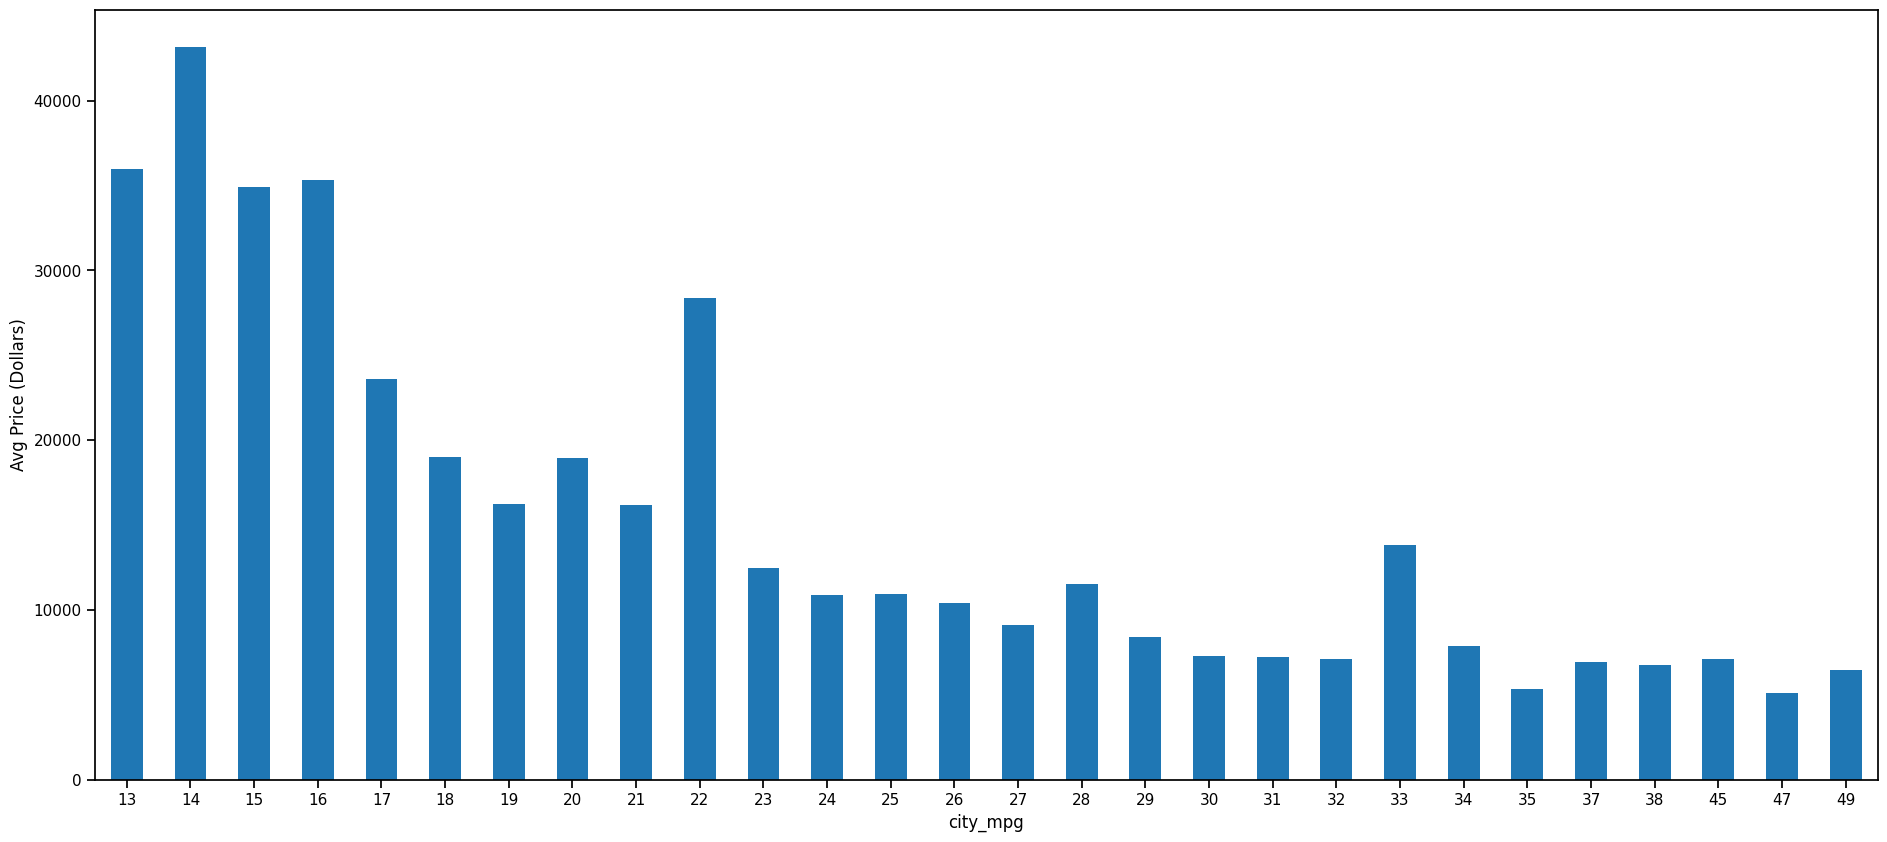

In [47]:
city_mpg_price = auto[['city_mpg','price']].groupby("city_mpg", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 =city_mpg_price.plot(x = 'city_mpg', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("city_mpg")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
enc=LabelEncoder()


In [50]:
auto.make=enc.fit_transform(auto.make)
auto.fuel_type=enc.fit_transform(auto.fuel_type)
auto.aspiration=enc.fit_transform(auto.aspiration)
auto.num_of_doors=enc.fit_transform(auto.num_of_doors)
auto.body_style=enc.fit_transform(auto.body_style)
auto.drive_wheels=enc.fit_transform(auto.drive_wheels)
auto.engine_type=enc.fit_transform(auto.engine_type)
auto.fuel_system=enc.fit_transform(auto.fuel_system)
auto.normalized_losses=enc.fit_transform(auto.normalized_losses)

In [51]:
auto


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,wheel_base,curb_weight,engine_type,engine_size,fuel_system,bore,compression_ratio,horsepower,peak_rpm,city_mpg,price
0,3,26,0,1,0,1,0,2,88.6,2548,0,130,4,3.47,9.00,111,5000,21,16500
1,1,26,0,1,0,1,2,2,94.5,2823,4,152,4,2.68,9.00,154,5000,19,16500
2,2,27,1,1,0,0,3,1,99.8,2337,2,109,4,3.19,10.00,102,5500,24,13950
3,2,27,1,1,0,0,3,0,99.4,2824,2,136,4,3.19,8.00,115,5500,18,17450
4,2,26,1,1,0,1,3,1,99.8,2507,2,136,4,3.19,8.50,110,5500,19,15250
5,1,25,1,1,0,0,3,1,105.8,2844,2,136,4,3.19,8.50,110,5500,19,17710
6,1,26,1,1,0,0,4,1,105.8,2954,2,136,4,3.19,8.50,110,5500,19,18920
7,1,25,1,1,1,0,3,1,105.8,3086,2,131,4,3.13,8.30,140,5500,17,23875
8,2,31,2,1,0,1,3,2,101.2,2395,2,108,4,3.50,8.80,101,5800,23,16430
9,0,31,2,1,0,0,3,2,101.2,2395,2,108,4,3.50,8.80,101,5800,23,16925


In [52]:
auto.apply(pd.to_numeric)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,wheel_base,curb_weight,engine_type,engine_size,fuel_system,bore,compression_ratio,horsepower,peak_rpm,city_mpg,price
0,3,26,0,1,0,1,0,2,88.6,2548,0,130,4,3.47,9.00,111,5000,21,16500
1,1,26,0,1,0,1,2,2,94.5,2823,4,152,4,2.68,9.00,154,5000,19,16500
2,2,27,1,1,0,0,3,1,99.8,2337,2,109,4,3.19,10.00,102,5500,24,13950
3,2,27,1,1,0,0,3,0,99.4,2824,2,136,4,3.19,8.00,115,5500,18,17450
4,2,26,1,1,0,1,3,1,99.8,2507,2,136,4,3.19,8.50,110,5500,19,15250
5,1,25,1,1,0,0,3,1,105.8,2844,2,136,4,3.19,8.50,110,5500,19,17710
6,1,26,1,1,0,0,4,1,105.8,2954,2,136,4,3.19,8.50,110,5500,19,18920
7,1,25,1,1,1,0,3,1,105.8,3086,2,131,4,3.13,8.30,140,5500,17,23875
8,2,31,2,1,0,1,3,2,101.2,2395,2,108,4,3.50,8.80,101,5800,23,16430
9,0,31,2,1,0,0,3,2,101.2,2395,2,108,4,3.50,8.80,101,5800,23,16925


In [53]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 199
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int64  
 1   normalized_losses  192 non-null    int64  
 2   make               192 non-null    int64  
 3   fuel_type          192 non-null    int64  
 4   aspiration         192 non-null    int64  
 5   num_of_doors       192 non-null    int64  
 6   body_style         192 non-null    int64  
 7   drive_wheels       192 non-null    int64  
 8   wheel_base         192 non-null    float64
 9   curb_weight        192 non-null    int64  
 10  engine_type        192 non-null    int64  
 11  engine_size        192 non-null    int64  
 12  fuel_system        192 non-null    int64  
 13  bore               192 non-null    object 
 14  compression_ratio  192 non-null    float64
 15  horsepower         192 non-null    object 
 16  peak_rpm           192 non

In [54]:
auto.shape

(192, 19)

## MODEL BUILDING

#### 1. Modeling with Linear Reggression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [56]:
X=auto.iloc[:,:-1]
y=auto.price

In [57]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 199
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int64  
 1   normalized_losses  192 non-null    int64  
 2   make               192 non-null    int64  
 3   fuel_type          192 non-null    int64  
 4   aspiration         192 non-null    int64  
 5   num_of_doors       192 non-null    int64  
 6   body_style         192 non-null    int64  
 7   drive_wheels       192 non-null    int64  
 8   wheel_base         192 non-null    float64
 9   curb_weight        192 non-null    int64  
 10  engine_type        192 non-null    int64  
 11  engine_size        192 non-null    int64  
 12  fuel_system        192 non-null    int64  
 13  bore               192 non-null    object 
 14  compression_ratio  192 non-null    float64
 15  horsepower         192 non-null    object 
 16  peak_rpm           192 non

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=10)

In [59]:
model=LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)
y_predict=model.predict(X_test)

In [60]:
r2_score(y_test,y_predict)


0.8239055739361454

In [61]:
mean_absolute_error(y_test,y_predict)


2486.5791639620275

#### 2. Modeling  with Random Forest()

In [62]:
from sklearn.ensemble import RandomForestRegressor


In [63]:
model=RandomForestRegressor(max_features='log2',max_depth=400,n_estimators=700,min_samples_split=3,random_state=15,)
model.fit(X_train,y_train)
model.predict(X_test)
y_predict=model.predict(X_test)

### Model Evaluation


In [64]:
from sklearn.metrics import  mean_absolute_error


In [65]:
r2_score(y_test,y_predict)


0.90894446997303

In [66]:
mean_absolute_error(y_test,y_predict)


1711.8152055614457

In [67]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.982953
Accuracy on test set: 0.908944


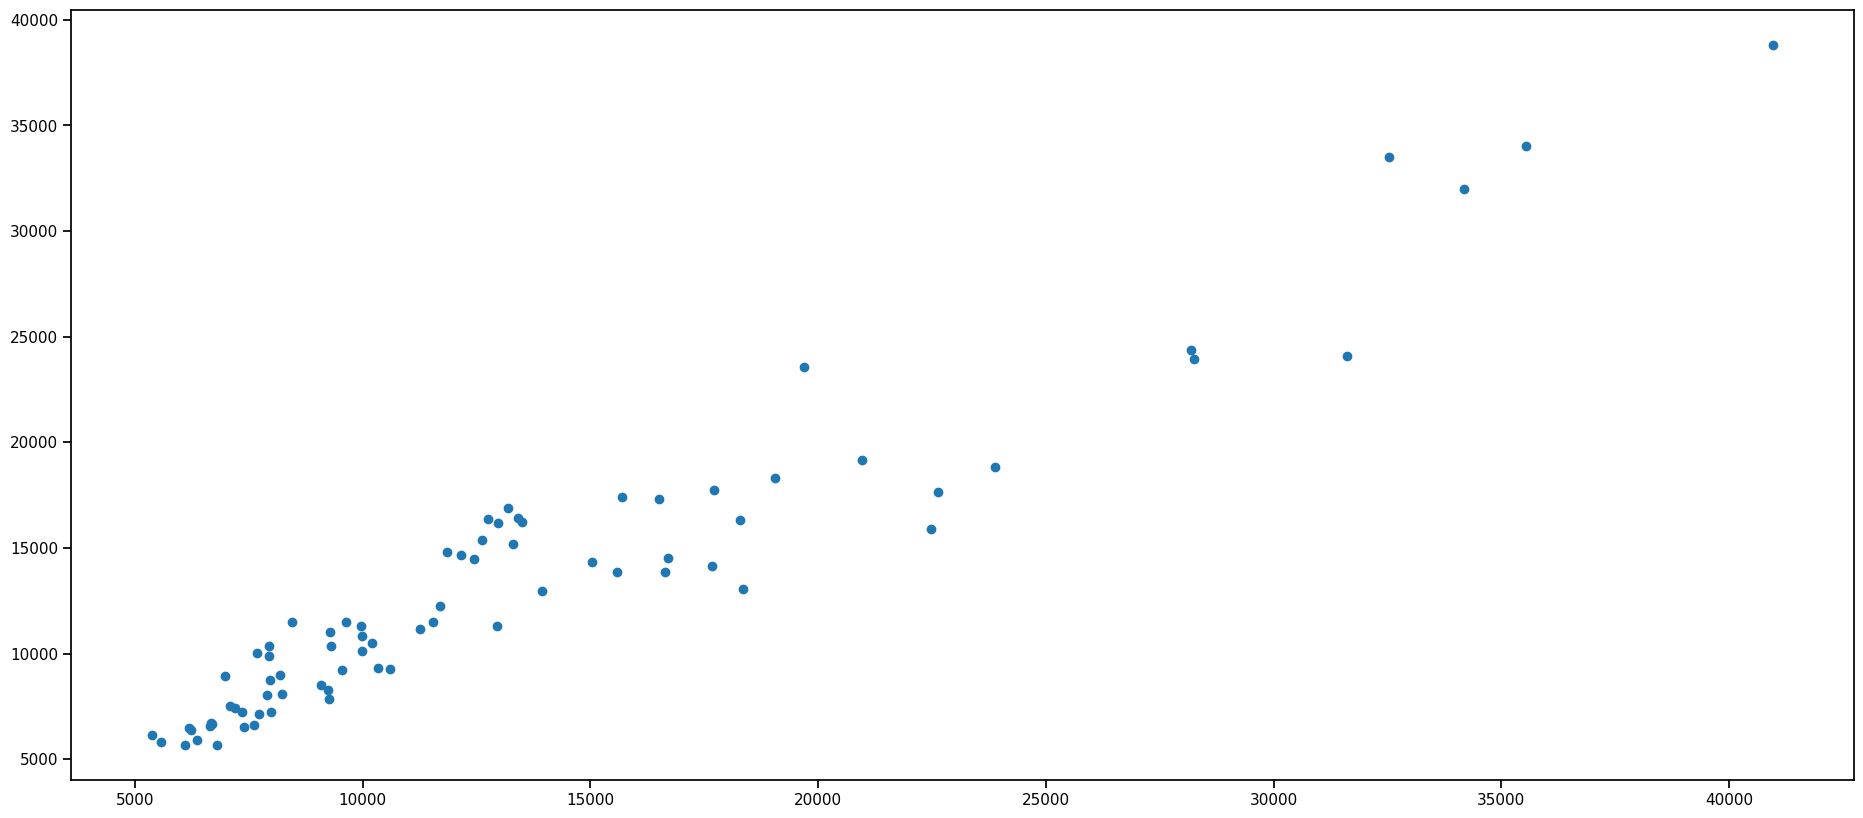

In [68]:
plt.scatter(y_test,y_predict)
sb.set_style('whitegrid')

<Axes: xlabel='price', ylabel='Density'>

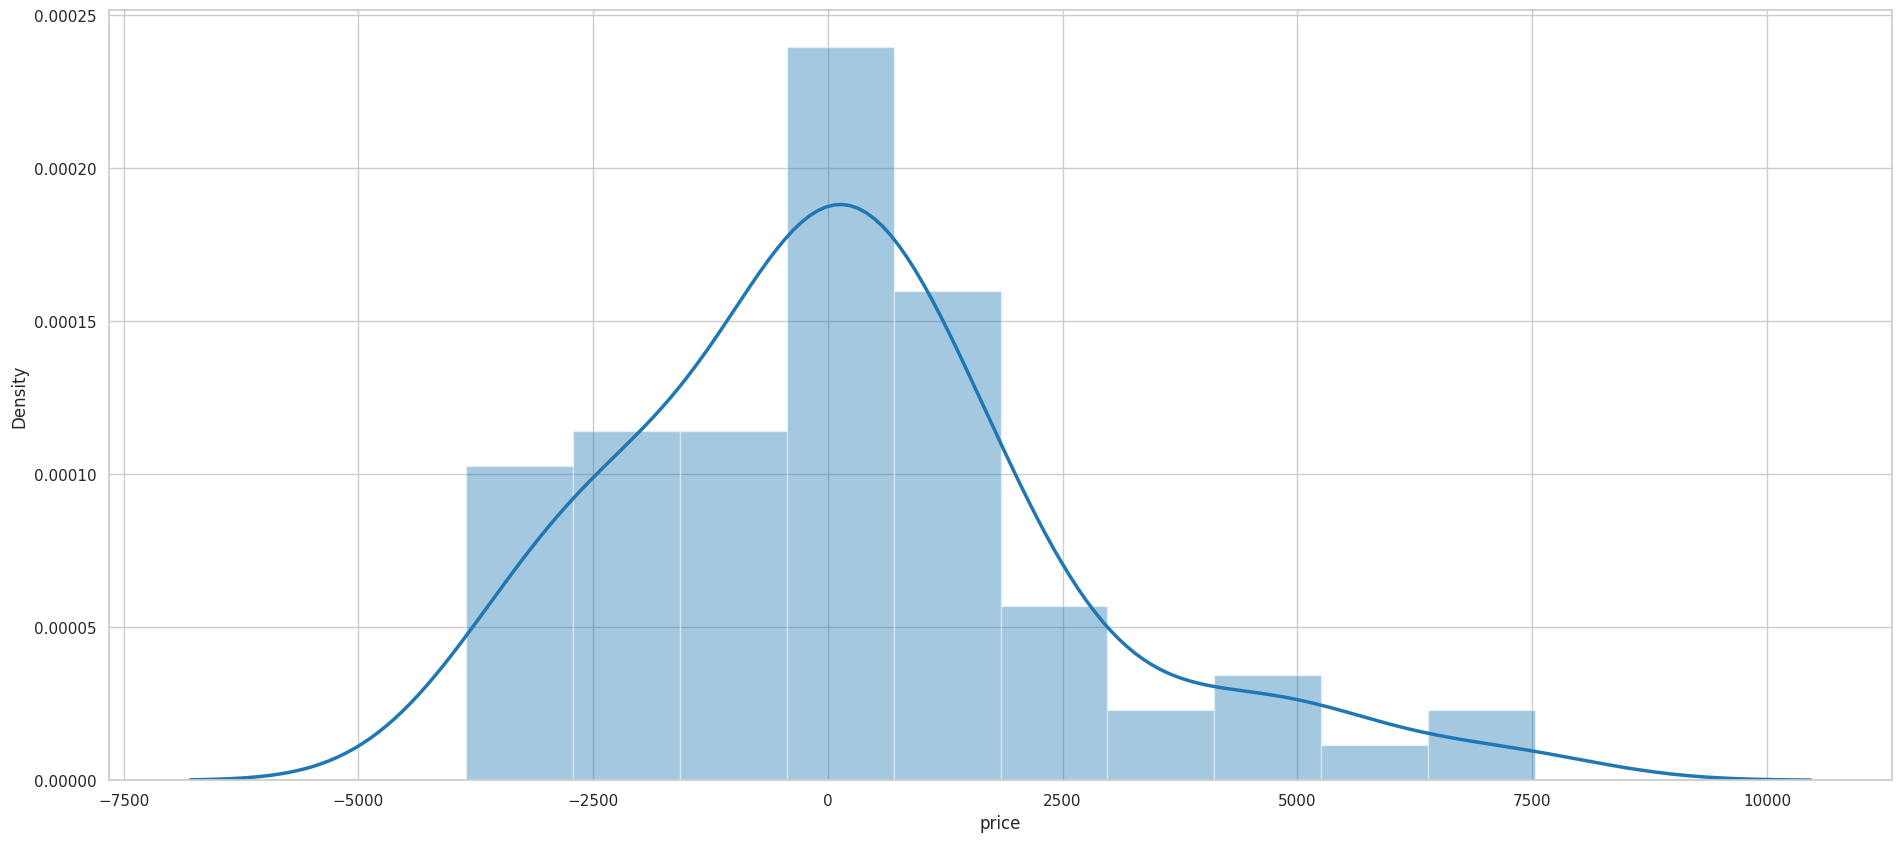

In [69]:
sb.distplot(y_test-y_predict)

## Feature Engineering

#### 1. Feature Importances


Feature importance gives % value of contribution of feature to the model & we can reject those lesser % value of non-contributing features.

In [70]:
model.feature_importances_


array([0.00699609, 0.0078434 , 0.02064145, 0.0016009 , 0.00289606,
       0.00471369, 0.01380951, 0.05379309, 0.0446645 , 0.14767289,
       0.00783445, 0.23974581, 0.05312242, 0.03560379, 0.02356465,
       0.16056032, 0.01454701, 0.16038995])

In [71]:
pd.DataFrame(model.feature_importances_,index= X.columns).sort_values(0,ascending=False)

,0
engine_size,0.239746
horsepower,0.160560
city_mpg,0.160390
curb_weight,0.147673
drive_wheels,0.053793
fuel_system,0.053122
wheel_base,0.044665
bore,0.035604
compression_ratio,0.023565
make,0.020641


#### Dropping features based on importances

In [72]:
auto.drop(['fuel_type','num_of_doors','aspiration','symboling','make','body_style','engine_type','peak_rpm',],axis=1,inplace=True)


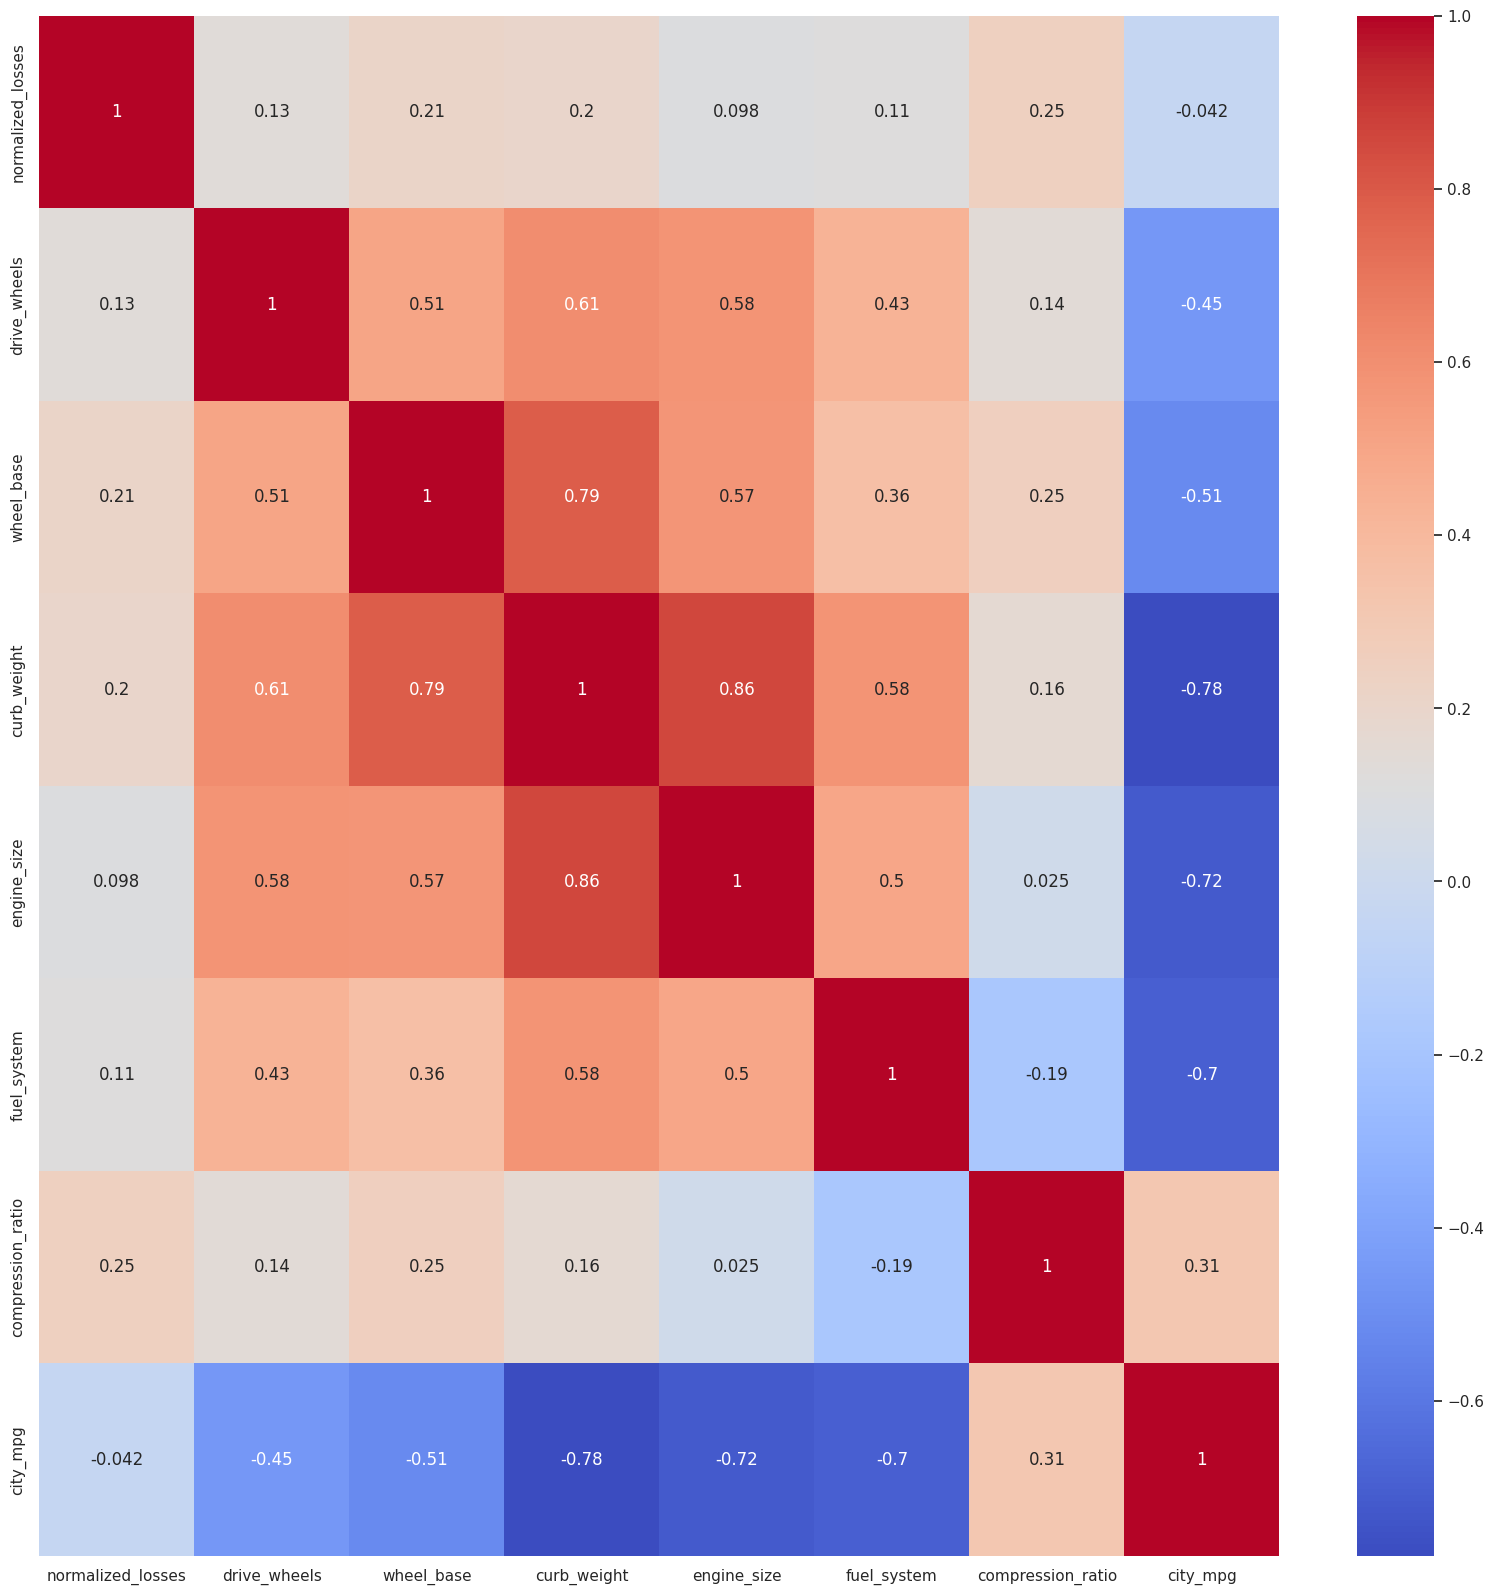

In [73]:
# Based on the below heat maps, (curb_weight, engine_size, wheel_base) are hightly correlated.
## check the possiblity of droping any of two features from above
chk_heatmap = auto.iloc[:,:-1]
plt.figure(figsize=(20,20))
hm =sb.heatmap(chk_heatmap.corr(),annot=True,cmap="coolwarm")

In [74]:
auto_final=auto.copy()


In [75]:
X=auto_final.iloc[:,:-1]
y=auto_final.price

## 2.  Scaling


In [76]:
from sklearn.preprocessing import scale
pd.DataFrame(scale(auto_final),columns=auto_final.columns)

,normalized_losses,drive_wheels,wheel_base,curb_weight,engine_size,fuel_system,bore,compression_ratio,horsepower,city_mpg,price
0,0.079832,1.232131,-1.699327,-0.025780,0.045333,0.870534,0.514714,-0.289085,0.199106,-0.681639,0.397582
1,0.079832,1.232131,-0.733205,0.496340,0.574304,0.870534,-2.387586,-0.289085,1.331990,-0.995111,0.397582
2,0.151458,-0.587632,0.134667,-0.426388,-0.459593,0.870534,-0.513949,-0.037616,-0.038010,-0.211430,0.082342
3,0.151458,-2.407394,0.069167,0.498239,0.189598,0.870534,-0.513949,-0.540554,0.304490,-1.151847,0.515024
4,0.079832,-0.587632,0.134667,-0.103623,0.189598,0.870534,-0.513949,-0.414819,0.172759,-0.995111,0.243052
5,0.008207,-0.587632,1.117163,0.536211,0.189598,0.870534,-0.513949,-0.414819,0.172759,-0.995111,0.547167
6,0.079832,-0.587632,1.117163,0.745059,0.189598,0.870534,-0.513949,-0.414819,0.172759,-0.995111,0.696751
7,0.008207,-0.587632,1.117163,0.995676,0.069377,0.870534,-0.734377,-0.465113,0.963144,-1.308583,1.309306
8,0.437959,1.232131,0.363916,-0.316268,-0.483637,0.870534,0.624928,-0.339379,-0.064356,-0.368166,0.388928
9,0.437959,1.232131,0.363916,-0.316268,-0.483637,0.870534,0.624928,-0.339379,-0.064356,-0.368166,0.450122


In [77]:
from sklearn.preprocessing import scale
pd.DataFrame(scale(auto_final),columns=auto_final.columns)

,normalized_losses,drive_wheels,wheel_base,curb_weight,engine_size,fuel_system,bore,compression_ratio,horsepower,city_mpg,price
0,0.079832,1.232131,-1.699327,-0.025780,0.045333,0.870534,0.514714,-0.289085,0.199106,-0.681639,0.397582
1,0.079832,1.232131,-0.733205,0.496340,0.574304,0.870534,-2.387586,-0.289085,1.331990,-0.995111,0.397582
2,0.151458,-0.587632,0.134667,-0.426388,-0.459593,0.870534,-0.513949,-0.037616,-0.038010,-0.211430,0.082342
3,0.151458,-2.407394,0.069167,0.498239,0.189598,0.870534,-0.513949,-0.540554,0.304490,-1.151847,0.515024
4,0.079832,-0.587632,0.134667,-0.103623,0.189598,0.870534,-0.513949,-0.414819,0.172759,-0.995111,0.243052
5,0.008207,-0.587632,1.117163,0.536211,0.189598,0.870534,-0.513949,-0.414819,0.172759,-0.995111,0.547167
6,0.079832,-0.587632,1.117163,0.745059,0.189598,0.870534,-0.513949,-0.414819,0.172759,-0.995111,0.696751
7,0.008207,-0.587632,1.117163,0.995676,0.069377,0.870534,-0.734377,-0.465113,0.963144,-1.308583,1.309306
8,0.437959,1.232131,0.363916,-0.316268,-0.483637,0.870534,0.624928,-0.339379,-0.064356,-0.368166,0.388928
9,0.437959,1.232131,0.363916,-0.316268,-0.483637,0.870534,0.624928,-0.339379,-0.064356,-0.368166,0.450122


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)


### Hyperparameter tuning with Random Forest

In [79]:
model=RandomForestRegressor(max_features=0.1,max_depth=950,n_estimators=1000,min_samples_split=2,random_state=None,)
model.fit(X_train,y_train)
model.predict(X_test)
y_predict=model.predict(X_test)

In [80]:
r2_score(y_test,y_predict)


0.8481125939846035

In [81]:
mean_absolute_error(y_test,y_predict)


2172.408904761904

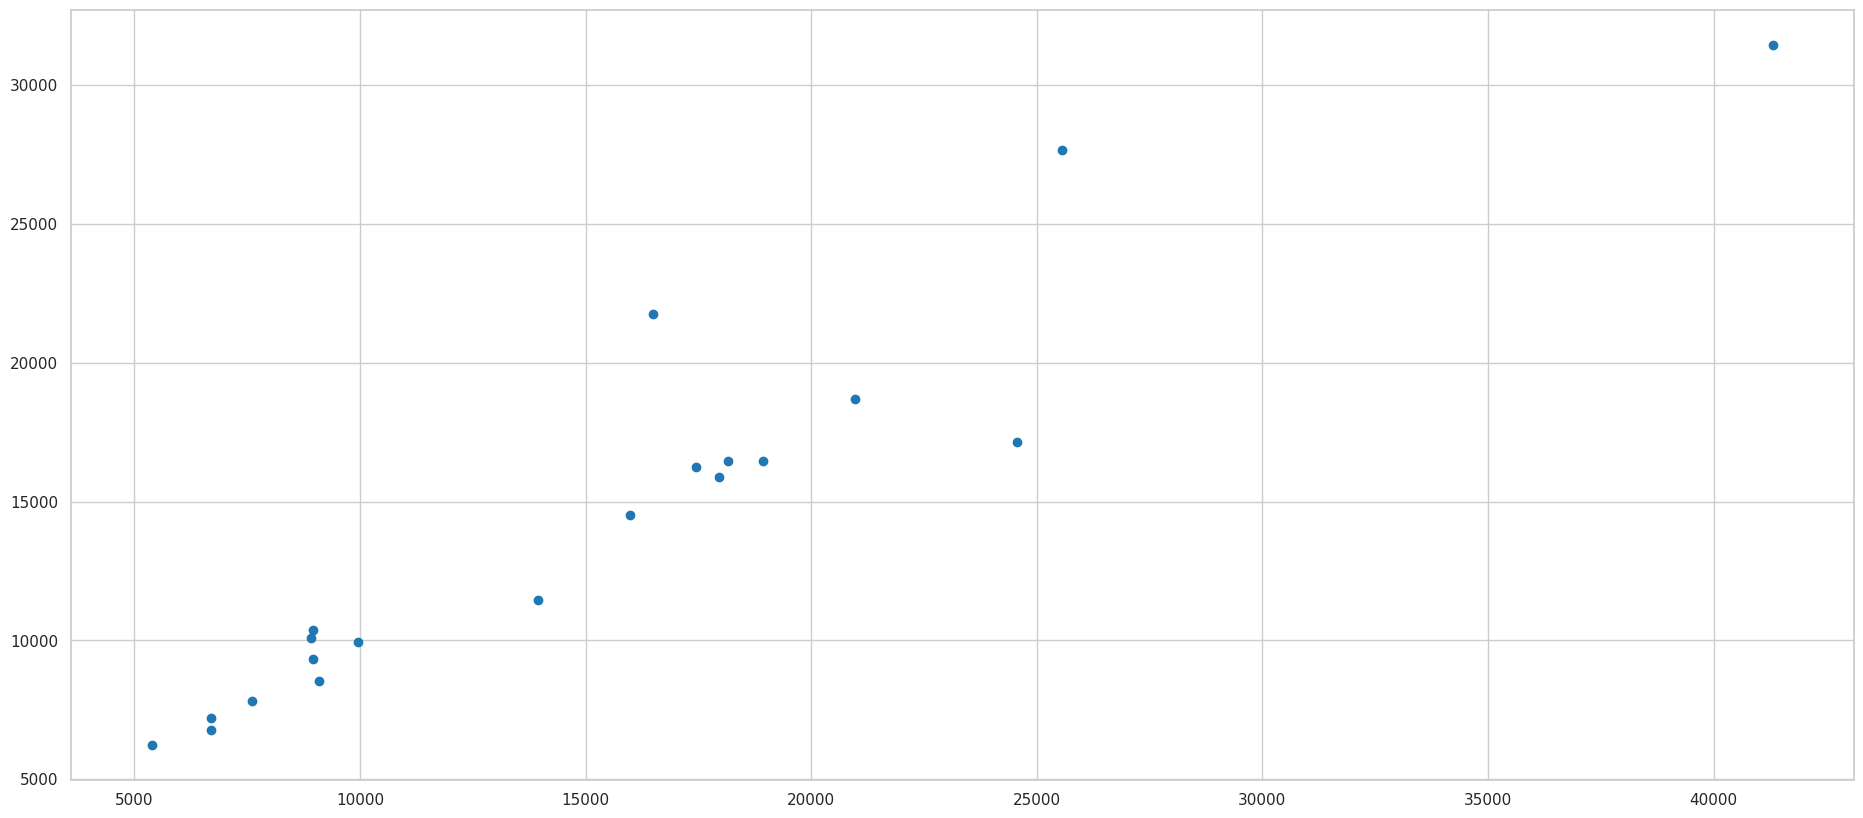

In [82]:
plt.scatter(y_test,y_predict,)

sb.set_style('whitegrid')

<Axes: xlabel='price', ylabel='Density'>

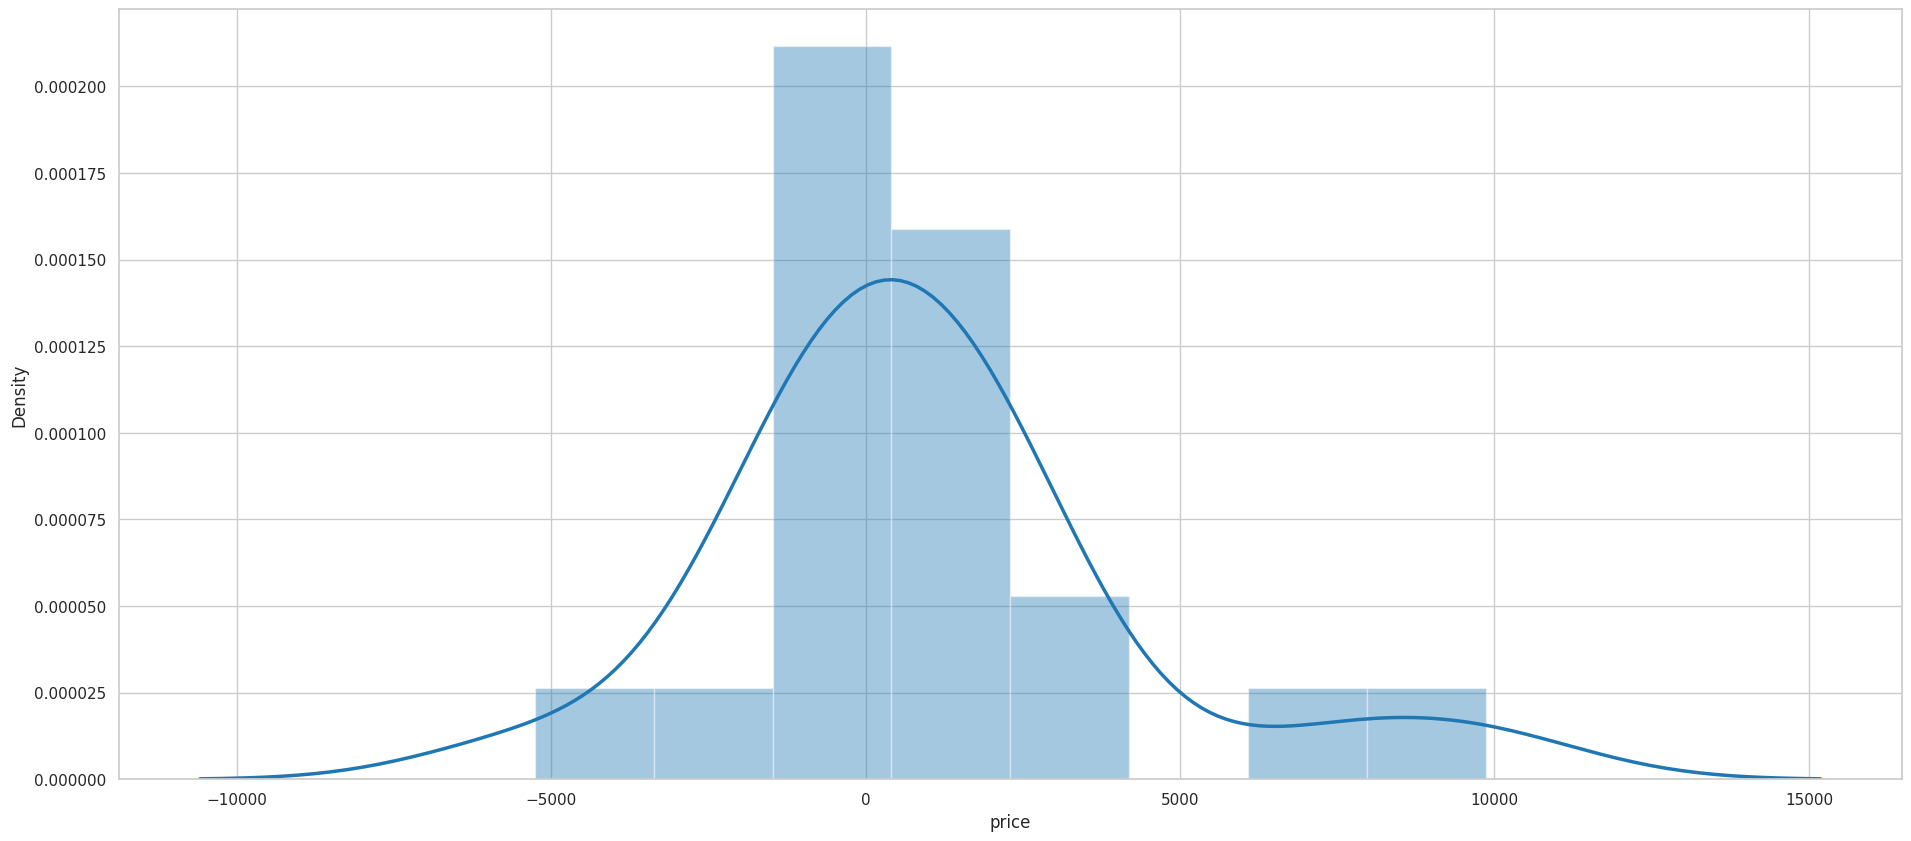

In [83]:
sb.distplot(y_test-y_predict)
